In [5]:
import librosa
import soundfile as sf
import os
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq,ifft
from scipy import signal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import silhouette_score

In [36]:
df = pd.DataFrame(columns=['chroma_mean','chroma_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var',
                           'spectral_bandwidth_mean','spectral_bandwidth_var',
                           'spectral_rolloff_mean','spectral_rolloff_var','mfcc1_mean','mfcc1_var',
                           'mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var',
                           'mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var',
                           'mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var',
                           'mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var',
                           'mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var',
                           'mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var',
                           'mfcc20_mean','mfcc20_var',"result"
                          ])

dir_ = './Recongise_identity/'
original = list(os.listdir(dir_))
print(original)
for name in original:
    directory = dir_ + name
    audios = list(os.listdir(directory))
    for a in audios:
        audio, sr = librosa.load(f"./Recongise_identity/{name}/{a}", duration=2)
        audio = librosa.effects.trim(audio)
        audio = audio[0]
        
        features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                    librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var(), 
                    librosa.feature.spectral_centroid(y=audio).mean(),librosa.feature.spectral_centroid(y=audio).var(),
                    librosa.feature.spectral_bandwidth(y=audio).mean(),librosa.feature.spectral_bandwidth(y=audio).var(),
                    librosa.feature.spectral_rolloff(y=audio).mean(),librosa.feature.spectral_rolloff(y=audio).var()]
        
        mfcc = librosa.feature.mfcc(y=audio)
        mfcc_list = []
        for i in range(len(mfcc)):
            mfcc_list.append(mfcc[i].mean())
            mfcc_list.append(mfcc[i].var())
        
        features = features + mfcc_list
        
        if name == "Momen" :
            features.append("Momen")
        elif name  == "Amr":
            features.append("Amr")
        elif name == "Mariam" :
            features.append("Mariam")
        elif name == "Ibrahim":
            features.append("Ibrahim")
        else:
            features.append("Others")
            
        print(name)
        print(a)
        print(features)
        df.loc[len(df)] = features
        

['Amr', 'empt_records', 'Ibrahim', 'Mariam', 'Misara_Ahmed', 'Mohamed_Mostafa', 'Moheb', 'Momen', 'Naira_Youssif', 'Neveen', 'Omar_Anwar', 'Radwa_Yousry', 'randomstuff', 'Rawan', 'Sama_Mostafa', 'Sara_amgad', 'Shirouq', 'Sohaila_Mohamed', 'Youssif_Essam']
Amr
10.wav
[0.33362055, 0.095132716, 0.04084649, 0.0023977284, 2052.7408088971324, 525579.9662545482, 1871.0000575164067, 222105.0118048482, 3769.0530711206898, 2385099.4295711047, -295.57632, 3807.3665, 110.98385, 1434.5273, -28.768417, 996.5766, 23.897562, 437.07678, -7.467998, 285.75317, -6.4250636, 226.78786, -6.1016054, 246.32013, -13.735804, 97.650696, -17.681055, 239.18837, 5.460186, 156.7574, -3.817254, 205.50038, -3.5529287, 93.90129, 0.18759122, 68.52474, -4.297705, 80.50818, -1.3661292, 88.34936, 0.7867995, 109.071625, -11.42828, 75.02279, -0.88320017, 39.580692, -10.479553, 51.611053, -4.341966, 71.09083, 'Amr']
Amr
11.wav
[0.38380048, 0.090670824, 0.025999783, 0.001143617, 1628.6063694115744, 318661.2619936882, 1960.53568

Amr
31.wav
[0.42367035, 0.09586166, 0.07468008, 0.010180159, 1962.2856949511058, 1057575.3316763493, 2068.427109200333, 563662.2456016559, 3957.159213362069, 5255580.579357113, -314.1765, 6135.8867, 117.74322, 2656.5242, 5.0719, 611.5792, 16.064981, 227.97694, 4.9964976, 264.41605, -2.2719967, 253.24944, -12.797027, 221.01414, -14.234717, 300.41843, -1.9030285, 219.9508, -9.841772, 114.97301, -5.547336, 106.68862, -3.7809641, 65.77682, -4.600058, 51.48579, 2.9161034, 78.047806, -8.100336, 55.098846, 0.41563907, 73.482124, 0.10801529, 45.98731, -6.1396337, 70.814644, -4.446473, 61.261204, 3.3989155, 61.083183, 'Amr']
Amr
32.wav
[0.41166556, 0.09737985, 0.051407248, 0.0067912852, 1822.3082923429306, 758308.6779361457, 2025.4200321265323, 341138.1794624741, 3617.083108836207, 4393660.523435024, -366.93427, 8451.403, 108.77604, 1741.3292, 7.6131573, 358.8279, 13.568181, 417.66928, 5.6177697, 307.7565, -3.5423381, 248.07108, -11.731269, 117.7484, -13.8421755, 309.05057, -4.2718263, 65.17242

Amr
47.wav
[0.41281384, 0.10114747, 0.026358832, 0.0013166133, 1162.7596030048649, 276401.51237727137, 1480.0777427262556, 126847.52965634425, 1979.5696390086207, 1298938.094750313, -441.58173, 11782.2705, 113.112854, 1721.5243, 13.040189, 820.62024, 8.862967, 516.89777, 8.905304, 250.73943, 6.927639, 329.0001, -1.6482044, 363.22025, -11.183712, 343.11807, -0.83991617, 137.89572, 0.8976357, 94.33856, -4.33362, 152.69614, -2.2907348, 71.881004, -2.9643717, 57.88385, -1.9766015, 92.12839, -4.4768963, 91.73471, 1.739847, 119.12212, -7.4320784, 112.579834, -3.9144704, 66.703606, -5.102596, 43.16548, -4.24008, 71.90402, 'Amr']
Amr
48.wav
[0.43929073, 0.0925199, 0.04566861, 0.0046039373, 1449.7420902715717, 329244.771792215, 1927.9024734351913, 192225.33830154748, 2727.6628165409484, 2366547.038346777, -408.88803, 22511.727, 83.58272, 2684.9602, 18.375444, 802.6187, 13.203295, 367.03842, 7.5411863, 420.61853, 2.150919, 481.39767, -0.40390658, 150.35947, -0.9510729, 87.78956, -6.398027, 129.2

Amr
63.wav
[0.42362946, 0.09453738, 0.01658701, 0.0006923534, 1102.5261450902021, 200082.9476148208, 1424.0870994304203, 126136.88880164939, 1883.7840113146551, 1106272.278710863, -471.96045, 10152.14, 127.442024, 1028.9396, 19.524422, 338.8638, -1.9698855, 564.96234, -0.04133501, 189.23752, 2.7973251, 239.02344, -0.33016217, 292.66824, -6.668146, 87.9478, -6.509477, 120.796524, -1.8702422, 131.72166, 1.0518569, 85.615204, -5.0992203, 63.271114, -6.6774116, 46.39501, 1.1285603, 52.105743, -0.15134227, 55.393112, -0.15148853, 69.541595, -5.0852876, 138.32173, -3.6497183, 50.28276, -3.4482408, 55.772484, -1.4297872, 35.804375, 'Amr']
Amr
64.wav
[0.428113, 0.09685374, 0.019451275, 0.00081115455, 1399.4263836029336, 361998.64184552844, 1734.3838569269758, 215444.510252963, 2593.760944234914, 1817723.988195378, -455.65375, 13137.146, 109.79343, 1062.7994, 13.678934, 524.18085, 8.715899, 498.41833, 12.115949, 292.3726, 2.5817869, 305.61197, -5.1976023, 343.87994, -2.4088244, 164.30836, -5.11

Amr
82.wav
[0.43224934, 0.10145565, 0.03417165, 0.002745726, 1283.1141551329235, 292538.15082814195, 1658.5479031395337, 147271.2277343243, 2135.1284684806033, 1657657.998295658, -441.05862, 21746.262, 85.654335, 1969.5487, 14.851815, 910.21, 13.636665, 478.5159, 9.007426, 393.7949, 4.668709, 173.43335, -2.0125883, 236.76161, -5.8691125, 75.081955, -6.222368, 94.45212, -4.39769, 134.12918, -2.7839086, 109.84356, 0.12672468, 44.675713, 1.7541046, 41.20549, 1.5666176, 108.66435, -1.0728049, 69.88108, 0.94611436, 44.4968, -4.8657975, 111.072815, 0.5164032, 50.43259, -5.6515217, 75.011154, -1.8846477, 42.515434, 'Amr']
Amr
83.wav
[0.4605862, 0.09626779, 0.027592707, 0.0021936232, 1236.6977129160284, 254458.0572995709, 1662.345595856334, 119570.31227648986, 2063.7223868534484, 1502248.798235985, -462.55658, 16402.375, 88.07753, 1762.854, 18.436192, 558.2854, 12.452044, 428.26608, 9.483807, 223.42194, 6.6286974, 231.65001, -1.2192044, 245.48053, -6.697074, 86.749016, -8.680064, 141.75961, -3

Amr
Amr16.wav
[0.2947175, 0.08833193, 0.04206405, 0.0020127958, 1093.507553944046, 166083.08125201683, 1486.2768292583276, 96118.73343881706, 1716.2310200352822, 949870.252196331, -392.9526, 14199.103, 150.93845, 1549.4089, 15.636254, 353.3066, -0.35764664, 827.3085, -15.864043, 244.13365, 11.023504, 465.44644, -13.480584, 176.20935, -6.1586456, 67.19558, -2.6951869, 90.47159, -10.262114, 99.8133, -3.7365503, 203.56352, 6.758079, 38.13348, 6.8993487, 39.518223, -4.7078776, 113.90195, -0.05701845, 36.081867, 3.8645122, 93.34449, 1.6477085, 64.21788, -5.9287376, 80.755104, 0.2210059, 59.616318, -3.1764398, 39.01874, 'Amr']
Amr
Amr17.wav
[0.2980901, 0.08936052, 0.028890954, 0.000947711, 1386.267687262484, 923424.7024831632, 1519.0641007670215, 143843.23580398952, 2232.6531661184213, 2643829.134490516, -416.1747, 15133.265, 142.26343, 2543.0996, -2.332091, 945.2871, 4.424831, 852.45844, -15.593473, 220.72888, 7.032399, 446.8808, -14.88554, 266.43686, -4.9611936, 108.84952, -5.777472, 46.57

Amr
Amr3.wav
[0.38780144, 0.08246733, 0.022819258, 0.0005900276, 1341.596497202232, 1244834.9889141193, 1548.970664897331, 128406.52789523474, 2079.7998046875, 2548683.495783806, -429.24515, 12759.64, 161.72519, 1975.6272, 3.3116734, 525.6651, -11.117394, 351.57526, -8.146919, 293.323, 14.336618, 269.06915, -13.814582, 302.7767, -0.48521876, 116.895546, -5.111576, 47.93311, -0.25635695, 52.0582, -2.5786717, 128.1555, 3.89312, 68.83918, 4.060491, 41.415558, -4.255814, 63.0738, 3.206834, 58.35259, 10.178966, 118.2476, -3.3337097, 77.50666, -2.2070587, 45.53867, -0.5806181, 25.055061, 1.9715424, 51.284485, 'Amr']
Amr
Amr30.wav
[0.3562292, 0.09369538, 0.03518113, 0.0015189375, 1586.5863964437538, 1714102.9124022992, 1783.5679949791372, 336591.6866367303, 2856.524020522388, 5729652.4273427725, -411.5361, 15342.89, 132.17662, 2677.4097, 16.819948, 671.16864, 13.115127, 842.5061, -11.752567, 264.50488, 10.051705, 447.7078, -15.192994, 155.71748, -6.9362636, 111.485825, -10.342023, 78.66243, 1

Amr
Amr43.wav
[0.34196502, 0.09190828, 0.046968453, 0.0020869167, 1556.4131338585698, 1527903.5926205434, 1804.4002810087093, 172142.52472054114, 2685.0347679781626, 4328807.385814849, -359.78848, 12328.306, 120.10489, 2113.3594, 23.129696, 816.963, 15.713113, 936.1516, -12.8270235, 276.77225, 6.0067325, 387.12222, -14.40179, 193.47046, -6.930695, 124.439545, -3.736217, 80.485954, 1.0609355, 127.767555, -5.210494, 132.49477, -1.7055324, 64.81316, 6.017616, 28.576971, 2.0321972, 136.08774, -2.7336848, 46.599476, 5.57711, 48.280983, 0.17300037, 46.886803, -1.5473868, 75.35032, -1.8863478, 68.61299, -0.14361513, 35.090206, 'Amr']
Amr
Amr44.wav
[0.30162036, 0.08691129, 0.05549537, 0.0027686711, 1219.675560158097, 783034.1776229064, 1543.0757782206863, 152776.4600920365, 2008.1657685429218, 2568619.7573354063, -365.19736, 15167.396, 139.54936, 2558.5215, 24.190052, 863.012, 10.811108, 664.9538, -17.784903, 251.5486, 5.6657014, 598.526, -14.432394, 125.13483, -5.607688, 192.95528, -6.5367756

Amr
Voice 006.wav
[0.41759416, 0.08730657, 0.025332673, 0.0009817265, 1348.2449881433527, 356249.40198262205, 1778.114199620267, 103826.63763329841, 2155.671639278017, 2327335.7915509753, -418.30325, 10074.43, 152.4651, 784.9468, 19.883692, 521.04456, -13.975749, 444.44568, -14.47843, 171.24976, 17.255291, 240.38171, -15.170377, 537.16614, 2.1020443, 124.80128, -12.973222, 78.30802, -7.5219874, 65.5102, -1.0579869, 102.958954, 4.572187, 66.80193, -0.97372717, 59.01633, -6.495188, 57.379036, -1.8236917, 66.87516, 0.9598632, 104.78492, -1.5638375, 95.44116, -4.5844707, 33.227013, -1.1817937, 46.319916, -3.3834622, 21.954067, 'Amr']
Amr
Voice 007.wav
[0.3798687, 0.08115261, 0.02672146, 0.0010427648, 1648.8093954039284, 541573.5960294742, 2036.0007163833873, 258324.82365375437, 3279.729593211207, 4755709.308998197, -405.60974, 11820.418, 133.7951, 989.22064, 18.078506, 575.4919, -10.380953, 826.3635, -11.578108, 230.98538, 8.898769, 180.10013, -20.83526, 228.4472, -2.201682, 113.375626, -7

Amr
Voice 020.wav
[0.36457276, 0.08329139, 0.02720803, 0.0007868935, 1161.4489494763282, 181096.65246322754, 1483.4699548637655, 84878.70976222793, 1730.2052464978449, 631674.7823821803, -405.95258, 10216.123, 162.41064, 1093.6667, -0.6430751, 822.0414, -14.324481, 569.0339, -6.167436, 343.43878, 3.8069742, 210.76215, -16.165764, 286.24487, -8.102723, 64.318115, -6.135403, 68.33111, -6.372648, 30.840923, -9.988434, 98.62371, -2.2677903, 59.52234, -1.1554497, 45.449406, -0.21887913, 69.39165, -6.8086514, 47.38437, 0.15903497, 112.65575, -5.5732117, 33.620907, -0.17636737, 74.96229, -4.4863844, 62.961758, -3.0457585, 19.39586, 'Amr']
Amr
Voice 021.wav
[0.3730671, 0.07952073, 0.026371652, 0.0008046952, 1127.4943393673138, 114327.86422849828, 1477.0900776890337, 75373.57946344788, 1657.0666082974137, 375067.23204917775, -410.19934, 11436.069, 164.59338, 848.327, 3.6413915, 717.19916, -18.040068, 508.97742, -6.9435544, 324.87402, 5.055996, 123.490715, -9.713548, 198.50728, -11.648514, 72.18

Amr
Voice 038.wav
[0.34859303, 0.084985815, 0.04027523, 0.0019059002, 1297.6358180079592, 229084.63150370712, 1620.2584356946838, 101840.36287513337, 1934.1519059806035, 960542.6270683941, -375.9771, 15688.43, 138.69511, 1427.1796, 7.781317, 955.7298, -8.618087, 682.37115, -16.922546, 465.24902, 2.1401272, 146.67043, -5.164788, 189.81207, -3.5945723, 85.737785, -12.144582, 96.54866, -2.2773423, 81.11773, -9.076136, 212.50467, 0.69623715, 93.86729, 4.108369, 36.457455, -2.6484592, 69.07786, -7.9793363, 46.320698, 4.621787, 135.01898, -5.977229, 103.44941, 2.247853, 46.39431, -3.9502435, 28.058905, -4.1689143, 23.437405, 'Amr']
Amr
Voice 039.wav
[0.36021656, 0.084983625, 0.044995066, 0.002442804, 1270.175089872548, 187190.84470434542, 1549.4835741643171, 89587.51392775569, 1883.9077653556035, 694812.016434675, -363.80414, 14659.445, 143.27313, 1423.762, 1.4497324, 977.156, -13.1799755, 445.3139, -13.594486, 480.3684, 5.480563, 176.09, -5.1885934, 228.82263, -8.110664, 64.53863, -11.21658

Amr
_Voice 019 (19).wav
[0.4081098, 0.08563843, 0.030012932, 0.0014487661, 1530.4724043904562, 407871.2463014805, 1954.285693795621, 251388.34384583673, 2719.9900660021553, 3819501.4282086506, -387.91733, 14864.308, 139.89119, 701.18243, 17.835157, 512.4413, -19.004477, 487.44836, -14.067678, 109.28532, 12.126143, 63.973385, -0.9311395, 88.47285, -0.24593814, 77.71596, -18.532446, 234.57042, 0.27942255, 60.195145, -3.5996988, 194.38225, 5.872808, 66.492096, 0.36689925, 70.45688, -6.9916706, 102.55752, -1.8610024, 44.251076, 4.755748, 110.43972, -8.3492775, 92.79451, -0.97963107, 79.50237, -5.1273117, 37.085526, -4.0042577, 31.302538, 'Amr']
Amr
_Voice 019 (2).wav
[0.43086648, 0.078386486, 0.025122982, 0.0011612376, 3096.4427817154524, 3100745.9682912575, 2499.0639137743638, 663978.1933274219, 5726.965752963362, 9107193.89580943, -360.96658, 7388.6597, 96.67283, 4642.972, 26.085377, 350.48672, -11.707892, 344.90866, -30.525038, 133.02783, 9.971677, 64.33815, -24.098557, 115.5937, 4.8165

Amr
_Voice 019 (31).wav
[0.42777583, 0.09082528, 0.038661227, 0.0017239162, 1139.726692915639, 99232.7383667439, 1503.9592764873378, 141286.31771382783, 1968.3080212823277, 1301441.3111104975, -373.74033, 13642.49, 155.33621, 757.2635, 12.770273, 418.3566, -8.181597, 643.3675, -16.873037, 329.52246, 14.598478, 346.66385, -10.667793, 335.6562, -3.6176395, 115.58886, -9.3995695, 105.36904, -4.7388783, 55.792324, -2.9853933, 73.98475, -3.8175926, 38.448486, -3.5528083, 36.95552, -2.0915644, 37.01788, -4.3792796, 57.77781, 7.242674, 133.87587, -5.2421327, 81.69974, -10.250389, 56.85055, 3.4032383, 81.188324, -6.1317625, 41.939613, 'Amr']
Amr
_Voice 019 (32).wav
[0.39507377, 0.09081214, 0.038644433, 0.0020939761, 1163.9604901465173, 106833.14179421499, 1496.3640867255501, 87115.25769709004, 1784.7807785560344, 774492.0910808052, -378.57648, 13264.984, 149.04889, 781.41516, 11.117878, 726.85895, -14.281057, 541.16034, -18.100855, 455.21436, 18.055687, 315.47345, -12.531785, 302.2784, -9.3973

empt_records
13.wav
[0.43974444, 0.08548833, 0.0018231124, 1.5481943e-06, 1177.4505713045703, 178395.9987850848, 1459.6648265488598, 77678.11257750951, 1927.9642039331898, 771198.617487827, -578.7001, 3150.724, 173.68625, 863.0264, -13.299924, 310.77942, -7.967953, 327.11603, -8.17704, 232.51926, 1.2478709, 127.34875, -9.742622, 80.25198, -2.3261611, 115.4904, -6.7903914, 83.58976, -2.5358808, 58.917053, -10.426376, 89.59259, -7.479108, 71.586075, -5.339519, 74.76587, -4.2972155, 39.772137, -13.43945, 47.418865, -4.146132, 71.43294, -4.941376, 69.00856, -3.900137, 41.571774, -8.80018, 28.353148, 1.6161045, 59.850536, 'Others']
empt_records
14.wav
[0.33569765, 0.09718167, 0.0052324883, 2.6563928e-05, 1440.1069259953229, 194941.86567521683, 1555.446241704287, 165599.49067432043, 2488.1987473060344, 1236093.255873951, -515.2893, 8083.389, 151.98514, 1068.2416, -31.844677, 1492.581, -19.212095, 166.69228, -11.224316, 604.66534, -13.946039, 263.16342, -6.9965734, 167.97026, -2.085127, 299.8

empt_records
28.wav
[0.5345668, 0.06772829, 0.04996272, 0.0026867222, 1665.1136793546093, 1359567.6875566093, 2221.539337174602, 690811.3421620122, 3492.2152815193967, 8447639.420226695, -370.99997, 15588.67, 83.56506, 1403.7778, 39.33704, 955.89325, 23.19074, 851.9141, 24.557344, 704.2066, 17.292597, 381.207, 3.9019248, 173.68472, 15.497163, 268.1332, -4.5998607, 69.07217, 0.7668977, 39.665405, -3.5798213, 41.702557, 1.544169, 31.444653, -9.315081, 46.152977, -4.3141026, 30.304163, -4.897015, 26.418718, 0.33786204, 35.45865, -9.989095, 39.350864, -3.2434843, 26.76523, -6.8423853, 23.326529, -3.5011468, 10.788304, 'Others']
empt_records
29.wav
[0.505389, 0.0715146, 0.01635743, 0.001603583, 1605.8765554781342, 1202291.6158298687, 1960.4047623147192, 755620.6332730212, 3066.5013806573274, 7998240.16403925, -526.2796, 8023.0713, 73.64843, 4290.683, 28.607893, 1137.8564, 7.9106307, 366.2988, 5.7224855, 230.00201, 1.3900474, 145.02754, -1.3251766, 72.30846, 1.0749215, 71.20577, -2.0194871, 

empt_records
7.wav
[0.47200146, 0.07055809, 0.0008979891, 2.15238e-08, 1012.5816006861238, 5625.933483628426, 1363.5999846989746, 6616.839102220009, 1419.2113415948277, 20648.441328871977, -635.59595, 192.96648, 186.42487, 33.948456, -6.577945, 63.148045, -20.221247, 16.740324, -19.700329, 32.637257, 3.995609, 30.41173, -15.1010065, 22.774015, -8.096612, 36.85813, -10.717844, 26.16784, -4.201197, 38.383915, -9.998011, 19.713547, -6.138062, 27.854012, -8.948031, 17.248722, -5.4425793, 21.56143, -12.887933, 15.7253065, -7.3060036, 29.242296, -11.227834, 14.406896, -0.7388842, 23.725586, -7.8237705, 19.916164, -0.6925162, 20.049389, 'Others']
empt_records
8.wav
[0.42445233, 0.08134736, 0.00095460674, 3.599597e-08, 1087.9415278192366, 134740.88792892537, 1475.5790015971163, 129132.73780258969, 1681.5699084051723, 1127854.877601197, -628.7008, 449.6471, 182.04927, 270.86652, -1.8740933, 148.93285, -18.09067, 55.246216, -17.405296, 29.402643, 7.260435, 51.90602, -13.193947, 50.343166, -5.609

Ibrahim
20.wav
[0.40551454, 0.09156581, 0.038661, 0.0025521545, 1670.7553707673603, 1077995.478007015, 1694.9579532816233, 365165.5518551669, 3205.724676724138, 3458658.3056376185, -410.1593, 19038.2, 111.025635, 3973.785, 7.8869123, 696.227, 24.99588, 960.067, -6.2232757, 486.60443, -0.90306944, 699.7268, 0.3208913, 163.75583, -2.560617, 119.52474, -4.991145, 128.48048, -0.43914956, 83.80825, -7.3318524, 215.343, -1.4753343, 47.52894, -6.9002643, 133.01006, -8.006117, 209.94902, 4.992966, 64.31405, -0.16524385, 32.047688, -1.8160508, 40.347847, 2.661459, 54.079746, -4.683745, 52.00197, -0.7557112, 53.663845, 'Ibrahim']
Ibrahim
21.wav
[0.4686018, 0.08304573, 0.02704775, 0.0019376513, 1820.27293940855, 934321.6566741742, 1891.065896122799, 420895.47389001417, 3544.439486799569, 4090868.196308825, -441.92694, 18148.84, 97.16011, 3249.041, 13.617127, 708.7572, 18.623894, 585.2632, -2.125628, 309.187, 0.39283973, 470.41928, 0.020318972, 151.50734, 2.501881, 202.11714, -4.106049, 159.81032,

Ibrahim
34.wav
[0.38184452, 0.095591664, 0.07723031, 0.009987002, 1601.6249563057222, 900525.9736205464, 1601.206510013408, 120033.97950084049, 3119.963126346983, 2144345.205081062, -318.57306, 17706.434, 116.68573, 1732.5171, 10.972668, 452.99124, 28.659357, 868.72003, -15.441405, 521.2869, 3.4648435, 396.62836, -5.032486, 107.67649, -8.019175, 108.24631, -3.7279694, 161.12924, -5.694163, 153.92908, -8.566627, 103.85073, -5.4710116, 71.51436, 0.35043094, 153.4686, -6.297543, 149.74391, -0.23159292, 73.68261, -6.342194, 53.67166, -5.182313, 51.947124, 2.190364, 46.701073, -5.7018228, 55.061134, -2.024654, 45.602676, 'Ibrahim']
Ibrahim
35.wav
[0.41330752, 0.093818225, 0.04973658, 0.006113145, 1431.3552616541701, 463956.2340050207, 1635.7831856398645, 240980.24007428813, 2912.5513537176726, 2081741.7315920815, -366.33975, 9555.993, 118.6689, 1259.0847, 19.963013, 569.67755, 15.782352, 741.33307, -5.667211, 353.3063, 6.26634, 546.9939, 1.026176, 239.6633, -8.282317, 89.59678, -14.212863, 

Ibrahim
48.wav
[0.36388978, 0.092805065, 0.04959591, 0.0060440707, 1045.0275902873545, 607102.1239600419, 1337.4421396117527, 230692.89884935357, 1878.9576037176723, 2321855.418901807, -422.9016, 9884.301, 118.890274, 2506.7156, 40.80586, 398.72305, 21.529484, 823.0861, -3.8084362, 522.0393, 9.126745, 455.00073, 0.95719916, 319.9094, -10.47676, 131.49318, -12.859858, 86.21309, -10.256503, 64.29027, -5.9100237, 118.22749, -3.4035382, 83.854485, -3.4711564, 90.91414, -7.9778666, 78.02148, 1.7144638, 112.9472, -1.2869177, 55.0179, -4.1899815, 37.795547, -2.1025264, 54.40458, -6.5067143, 41.939896, -2.2206423, 29.77051, 'Ibrahim']
Ibrahim
49.wav
[0.30963534, 0.09337584, 0.044549283, 0.004471536, 924.7344017471594, 295340.7732547977, 1301.743396860463, 147464.64737424452, 1469.0842200969828, 1135522.179936682, -440.16608, 8885.98, 119.470116, 2611.028, 44.31395, 308.39874, 17.512974, 331.09683, -3.513927, 412.8534, 3.8254848, 357.5815, 1.2774097, 187.67363, -7.4524684, 137.34358, -13.517626

Ibrahim
Ibrahim_false (10).wav
[0.35593367, 0.09887709, 0.100725845, 0.0015200601, 993.1369281308447, 206404.81100751742, 1305.8311328640611, 264195.7387126711, 1721.194118923611, 2108839.2652994315, -251.58522, 3407.081, 180.34557, 1179.4698, 4.574661, 400.43353, 33.436867, 181.2113, -38.865547, 479.78506, 5.6945505, 336.71146, -13.562491, 170.18777, -1.9264004, 88.59528, -19.842243, 213.50116, -6.4512196, 33.998436, -4.780538, 47.83204, -4.498956, 54.360413, 4.8701653, 36.680485, -13.019941, 40.392654, 2.8590052, 26.124372, -12.217651, 36.8524, -3.3034713, 19.057474, -0.21290353, 31.34801, -7.3204894, 28.835424, -4.354742, 16.25451, 'Ibrahim']
Ibrahim
Ibrahim_false (11).wav
[0.3819959, 0.10102179, 0.07182361, 0.0017794238, 1307.3527439506763, 250684.78832721306, 1565.3522981180265, 151507.15057391033, 2698.163519965278, 1236212.6556737921, -252.18639, 4176.7246, 153.15793, 772.84247, -13.923016, 464.6216, 51.163925, 497.88828, -7.336979, 197.20413, 5.0064588, 213.82422, -29.926031, 4

Ibrahim
Ibrahim_false (24).wav
[0.3408834, 0.1054528, 0.09363884, 0.0035256478, 1544.2157339567566, 652940.7670742391, 1730.9740038730943, 172327.23683478482, 3278.558349609375, 2590406.665317714, -255.3667, 6532.2485, 120.191635, 992.7418, 0.47680092, 419.6363, 63.26689, 600.45526, -9.23849, 350.1418, 1.9666868, 272.6748, -30.705276, 369.65555, 4.947857, 170.71191, -15.462353, 105.00302, -13.170351, 102.176186, 1.4001647, 53.57906, -18.153282, 115.22931, -6.41801, 64.28083, -12.788577, 57.05501, -0.026672386, 43.968494, -9.513415, 51.06138, -4.787525, 32.78092, 4.3117332, 42.267437, -8.371893, 36.15523, -8.918066, 52.64249, 'Ibrahim']
Ibrahim
Ibrahim_false (25).wav
[0.3526463, 0.09914527, 0.08136178, 0.002540253, 984.1842420384601, 115252.50416313474, 1408.5215038560084, 163887.53444661733, 1874.0220013786766, 1189288.0836985102, -309.63828, 9347.41, 161.20474, 1948.2104, 9.756792, 305.156, 38.293613, 567.43915, -11.080836, 303.8606, 0.64318913, 152.08644, -21.72255, 436.6707, 8.98625

Ibrahim
Ibrahim_false (38).wav
[0.385079, 0.096784405, 0.06764471, 0.00074922433, 1294.9011956415327, 704134.2214092192, 1432.314173120454, 211231.60901165835, 2376.696356411638, 2967214.699844684, -275.0212, 4424.331, 154.91245, 2454.4854, 1.8153129, 624.8473, 49.113533, 846.6521, -27.982666, 724.9547, -4.939358, 309.0145, -18.277107, 210.27625, 10.961393, 129.50359, -12.829625, 106.246544, -8.158037, 112.30523, -0.38175237, 92.35918, -14.635138, 71.481606, -1.1664333, 52.697063, -16.122868, 47.91326, 1.9866579, 46.813652, -6.4762917, 36.854736, -8.799686, 42.969303, -3.6395583, 32.835857, -11.271156, 30.41709, -8.416208, 41.390343, 'Ibrahim']
Ibrahim
Ibrahim_false (39).wav
[0.3864124, 0.09705588, 0.06602097, 0.002118269, 1194.4582390040005, 585790.7074748216, 1371.1885517625353, 227726.3233428789, 2235.5008282238923, 2853738.333378975, -322.65918, 6348.2075, 158.73164, 2497.0425, 8.002553, 820.55194, 41.133667, 581.877, -18.456703, 417.38782, -1.1652064, 271.35193, -17.973007, 182.92

Ibrahim
Ibrahim_false (9).wav
[0.4213849, 0.08609388, 0.05238561, 0.00148335, 963.0781413803509, 77964.91235643472, 1319.4073535676332, 118490.36566024333, 1816.3380589978449, 968321.6068407302, -316.92526, 4792.2505, 174.47275, 900.78577, 2.4789543, 238.79182, 42.11523, 229.1107, -18.50505, 311.0482, 8.094833, 189.43274, -14.284882, 218.45586, -3.981421, 103.87205, -10.343593, 61.207993, -3.673772, 65.357185, 2.4141304, 51.795086, -5.2161517, 28.897228, -0.21271282, 38.252945, -7.9988475, 61.072376, 4.3317723, 43.437828, -11.518978, 43.711548, -5.10086, 34.08352, -0.13558228, 10.855059, -3.8816817, 16.244877, -0.24860163, 15.411747, 'Ibrahim']
Ibrahim
ibrahim_open0.wav
[0.46189564, 0.10085511, 0.05714246, 0.005649379, 1521.234958941261, 547836.9016834156, 1710.496031485247, 420137.66658746696, 3212.880572150735, 3535658.30636437, -416.10886, 20981.824, 100.38161, 5798.5713, 8.190314, 537.2998, 21.869282, 620.1009, 7.9074163, 303.8804, 11.161032, 951.47473, 10.980428, 198.40771, 6.9521

Ibrahim
Ibrahim_open9.wav
[0.45626792, 0.11046723, 0.065267086, 0.0033890128, 759.2919587340169, 255003.88629479794, 1304.8601189678075, 333468.7364401986, 1348.875732421875, 2066388.954488933, -421.39413, 16122.606, 128.8666, 5549.134, 47.297466, 794.1401, 47.951107, 555.27997, 6.9901114, 1267.9146, 13.933887, 1430.7521, 21.495108, 271.3998, 14.176188, 328.11166, 2.4818108, 305.14838, 6.1494393, 158.39966, -3.113521, 154.01971, 0.02250576, 102.65055, -7.4231787, 154.84804, -4.9383597, 91.84739, 7.5341725, 50.1418, -4.265618, 66.147156, 1.2794775, 39.511707, 0.33672822, 32.10825, 1.4364036, 24.846983, -4.0889373, 21.280739, 'Ibrahim']
Ibrahim
ibrahim_other0.wav
[0.504267, 0.09026143, 0.037691627, 0.0027438507, 2032.252250837546, 1383890.5857362463, 2022.779918165893, 699411.3326833148, 4337.986427017405, 7685750.20243506, -466.74713, 14525.041, 84.017006, 5721.1274, 44.643223, 2041.575, 30.8462, 643.92755, -1.7886913, 338.74646, 2.3429103, 371.1836, 1.9916283, 165.12532, 3.8363404, 166

Mariam
17.wav
[0.39013013, 0.103151955, 0.08394006, 0.0128309615, 1776.8389956234444, 809895.3581029369, 1821.8787976710612, 295098.4128972523, 3536.395474137931, 4446530.294445267, -314.62936, 10301.7, 105.57798, 1515.7107, 19.134228, 913.4797, 9.983755, 403.35583, -8.721806, 599.86115, 6.668646, 150.76465, -21.028719, 510.45923, -8.175936, 105.49259, -5.680489, 242.44588, -11.450466, 188.48167, 0.5085985, 162.35728, -4.304328, 189.0845, -1.4141843, 80.51793, 0.9094878, 135.44215, 0.7653622, 87.36073, -6.555222, 94.90363, -5.7382317, 90.559364, -2.3177335, 98.575714, -6.627823, 70.84498, -4.417753, 106.13889, 'Mariam']
Mariam
18.wav
[0.36751634, 0.10645817, 0.123296544, 0.019674044, 1499.3838615917505, 147480.0905557983, 1771.8169398222944, 102967.33277464681, 3106.968952047414, 2033643.766542394, -271.26398, 11935.4375, 113.75593, 585.2222, 12.50273, 645.4671, 10.012952, 313.82996, -14.651955, 754.6744, 1.3338963, 161.56479, -33.575787, 432.7374, -16.845377, 142.25906, -8.433057, 164

Mariam
29.wav
[0.38049856, 0.103536054, 0.10733543, 0.020100148, 1255.073967777312, 50836.83067989193, 1589.5195513809613, 84752.67414985877, 2530.8938914331898, 813590.5883853697, -323.29852, 12291.458, 106.784225, 1401.5419, 18.329855, 774.3411, 4.9542594, 263.37277, -3.9076462, 440.07422, -1.4909407, 81.34196, -19.263454, 684.1395, -19.438227, 153.60211, -7.739743, 100.351105, -3.346592, 137.77972, -6.960942, 119.32476, -1.4104564, 183.22244, -7.942151, 99.314445, 0.191207, 84.49974, 0.57981026, 47.441048, -8.872164, 70.83072, -5.961278, 40.295204, -5.0957637, 56.902344, -8.973097, 63.89028, -6.936199, 38.42681, 'Mariam']
Mariam
3.wav
[0.32606664, 0.09404097, 0.08713065, 0.013408676, 1236.8064537764787, 104494.30818847554, 1585.8364523876573, 94855.1114052473, 2413.451306573276, 1295406.4106728602, -324.68674, 7263.0376, 121.77356, 662.2018, 27.804674, 294.17535, 5.7404428, 280.57318, -11.277953, 474.53333, -0.6486378, 227.2197, -28.176851, 485.76868, -17.255432, 133.0451, -6.396100

Mariam
42.wav
[0.25250876, 0.10383123, 0.059713807, 0.006748064, 1035.2713147665806, 184842.46033341906, 1510.2163661705508, 284943.96143453155, 2206.658304148707, 2830508.5605956996, -417.0852, 10745.075, 106.26088, 2024.3083, 39.720802, 455.07376, 19.373045, 329.20944, 3.3980398, 496.55804, 8.543625, 258.6881, -19.348036, 675.0791, -16.565193, 215.52896, -6.667887, 191.05402, -10.376445, 79.315315, -9.024396, 95.63282, -11.98921, 126.25181, -6.3734264, 77.90722, -0.49450937, 70.65136, -4.8031883, 73.484375, -13.456494, 86.862335, -8.986786, 44.41815, -4.2219024, 82.17878, -10.40555, 58.264374, -2.7486508, 67.08022, 'Mariam']
Mariam
43.wav
[0.28849927, 0.10070035, 0.078521594, 0.008252606, 1200.1151594092369, 316634.85835006466, 1577.643386957149, 309218.4469587888, 2445.751111260776, 2987575.677447597, -379.89993, 17335.312, 116.075226, 2557.5632, 23.868713, 676.7939, 17.926188, 312.90204, -1.088402, 752.18677, 9.133528, 304.5396, -20.658127, 698.0976, -12.457487, 221.24895, 1.476066

Mariam
8.wav
[0.33391824, 0.1003472, 0.091107845, 0.013301914, 1646.4887170255688, 768207.1977978493, 1806.8053788097643, 321869.2101634983, 3396.305899784483, 3565015.412244445, -298.8861, 8302.855, 112.99448, 1241.5217, 21.373688, 441.0831, 14.147506, 376.4271, -17.30373, 476.7983, 1.2326859, 216.67882, -29.145727, 632.222, -15.985209, 222.1248, -7.639514, 114.68255, -6.4216857, 69.8789, -3.1829565, 105.35026, -8.813891, 117.92233, -5.267044, 66.95771, -6.357014, 47.706257, 0.15917535, 140.43237, -8.501455, 57.55545, -8.169177, 50.294926, -4.2944794, 65.42923, -9.545348, 106.13043, -4.506349, 39.792458, 'Mariam']
Mariam
9.wav
[0.31944773, 0.101224616, 0.09590346, 0.02014446, 1445.044622929693, 194242.47958972986, 1676.2602503659705, 158150.33756804632, 2870.9699959590516, 2004981.4736403693, -293.6587, 7084.1123, 106.26951, 434.86557, 14.837667, 531.91736, 4.1304517, 438.7236, -17.02665, 436.13202, -6.373782, 226.47905, -27.470472, 536.7112, -17.173653, 110.4542, -6.671555, 145.0558,

Mariam
mariam_close6.wav
[0.32882345, 0.1070766, 0.033718236, 0.0011078998, 2114.609470606149, 942876.5096410018, 2250.5070924705897, 359617.03853127063, 4274.514475176411, 4789662.12876583, -403.88718, 13497.007, 99.00942, 1812.095, 1.0408193, 633.0096, 4.7377405, 902.549, 2.746018, 599.70917, 13.011649, 211.41797, 6.2906284, 165.0671, -11.548735, 220.20047, -9.092254, 325.35757, -1.3494347, 80.606964, -17.590887, 181.44499, 3.7084973, 98.78613, -15.040918, 79.85801, 0.904862, 109.49519, -6.8053575, 64.978775, -9.264075, 57.618412, -0.012887467, 47.55248, 0.41181657, 47.714348, -9.2479105, 141.70319, -1.0535883, 44.3295, 'Mariam']
Mariam
mariam_close7.wav
[0.3494319, 0.11735881, 0.03604415, 0.00078456575, 2309.999482845819, 1002145.4799574091, 2534.6559526774986, 326989.2630870109, 4887.449840198864, 4951278.19441488, -390.1987, 16893.81, 91.67933, 1570.4578, 12.531488, 709.02545, 6.9384017, 563.8696, 1.3252256, 409.41745, 18.837574, 219.99144, 5.700808, 329.50958, -15.272133, 348.675

Mariam
mariam_open6.wav
[0.2924315, 0.09417667, 0.02627914, 0.0006687334, 1842.944350608726, 491155.9499833452, 2288.5446300333488, 269174.6400546342, 3938.961181640625, 4238375.515477359, -428.75253, 12245.357, 111.497635, 1679.0808, 14.946808, 454.9537, 10.7379055, 712.37, 2.7564077, 612.41736, 3.326077, 448.66953, -0.67891395, 248.40862, -8.309916, 163.01653, -1.3589815, 143.83809, -2.9263217, 130.82028, -19.558262, 107.063675, -9.315915, 53.46698, -22.353796, 169.59146, -0.27144128, 125.31749, -10.324251, 42.62397, -2.6429505, 54.66256, -5.510451, 84.294174, 3.228653, 26.147238, -3.5556722, 88.700294, -1.3197348, 41.3118, 'Mariam']
Mariam
mariam_open7.wav
[0.33954597, 0.114079185, 0.02272711, 0.00036677506, 1783.965016480914, 977595.7493889852, 2071.982661679119, 468632.1753136576, 3574.679946899414, 5824333.234617807, -462.02588, 9411.392, 119.41776, 2599.4292, 14.383931, 466.046, 7.146348, 677.20715, 0.5737262, 601.52466, 13.127932, 219.17929, 2.2056906, 160.4664, 1.5978197, 193.

Mohamed_Mostafa
Mohamed_Mostafa1.wav
[0.45325518, 0.09455254, 0.10736138, 0.0072357007, 1508.9980793826667, 922342.945371306, 1828.1544232287065, 226266.97568856206, 3039.9336381392045, 3163534.899212359, -195.69928, 9151.766, 142.08778, 1486.0428, -4.6248755, 318.37234, 24.86583, 136.41776, -3.483958, 132.46552, 7.264731, 104.82277, -3.4516098, 48.076256, 2.2805848, 47.94188, -10.091211, 155.06212, 10.113124, 48.034714, -5.0486283, 180.71245, 4.520016, 51.364506, 2.8354435, 72.89342, 0.7468213, 95.618706, 0.61284405, 31.867657, 5.252551, 111.57722, -5.0059342, 70.006516, 3.5666807, 17.42853, -2.1127644, 18.810875, -2.0994546, 32.856625, 'Others']
Mohamed_Mostafa
Mohamed_Mostafa10.wav
[0.43067858, 0.10292864, 0.052882418, 0.002931134, 1132.9037685929302, 816987.077785679, 1670.4423651553298, 223733.1645873459, 2088.399312033582, 2558282.1333692507, -352.5026, 13711.381, 145.80107, 1708.0336, 20.126999, 343.1033, 18.822554, 360.27988, 15.715446, 156.61263, 11.145115, 134.05885, 0.053053

Moheb
Moheb12.wav
[0.42564192, 0.11066578, 0.09569792, 0.007452411, 1681.8615031698023, 1619048.073474909, 1948.1679629505782, 212338.18307608078, 3172.674363659274, 3722891.4938614345, -261.53146, 12423.736, 123.17594, 2178.911, 4.416078, 546.0569, 30.183481, 278.11487, 19.08559, 404.9507, 6.4412174, 374.97858, -0.2351078, 121.81097, -4.9081106, 117.41834, -13.0231695, 199.59435, -1.940269, 78.91876, -8.106351, 118.56423, 7.47455, 57.329765, -9.465944, 173.52803, -1.763272, 59.244747, -0.9167375, 57.108257, 10.478281, 106.10183, -6.0443454, 78.78309, 5.0334225, 21.045383, -1.2216189, 36.63453, 3.6422904, 65.19167, 'Others']
Moheb
Moheb13.wav
[0.41160002, 0.09862182, 0.0894068, 0.009649704, 1935.8813013805961, 1417148.3683505824, 2101.3191772205832, 353555.1480737345, 3794.812950721154, 4492528.34786501, -274.37762, 14224.948, 113.44943, 2752.6587, 3.3072004, 922.49585, 23.866621, 291.31805, 15.110158, 257.1826, 6.4735723, 389.32086, -3.8228369, 208.69858, -7.8051558, 69.88377, -12.865

Momen
16.wav
[0.3779343, 0.10014609, 0.051649004, 0.007351967, 1675.6847086115022, 315556.68954670045, 2065.9927190999074, 135972.5221834359, 3288.8873922413795, 2583961.811849535, -398.64746, 20245.895, 85.63662, 1051.4882, 26.176384, 890.4356, 13.82003, 375.8152, 1.1377374, 646.7562, 8.522336, 204.98329, -3.8313272, 268.55054, -6.413811, 170.34572, -20.45757, 316.78543, -3.0474472, 102.8971, -2.9118805, 153.31082, -2.0411446, 68.67216, -7.938868, 100.386215, -2.4640803, 59.409523, -2.0562878, 47.093353, -2.068658, 72.13658, -5.013426, 53.287613, -4.072866, 47.43364, -7.302758, 77.30476, -3.0251637, 34.04341, 'Momen']
Momen
17.wav
[0.48444137, 0.0893529, 0.04284589, 0.005526982, 2256.1389325009036, 1297088.3318543287, 2223.1462342996824, 245656.82874468475, 4371.611496497845, 4835819.706274695, -440.14084, 23361.959, 72.16524, 3021.8374, 17.074293, 408.24173, 16.736778, 176.35475, -1.5627933, 451.444, 5.5259023, 117.39051, -5.7302823, 385.59064, 3.1131382, 176.08167, -14.237737, 373.4

Momen
31.wav
[0.38944206, 0.09696229, 0.11272834, 0.015658125, 1349.260800935548, 96777.04787022935, 1656.7012078797006, 58830.96941061742, 2284.4084087171054, 953702.452321462, -315.81396, 28095.018, 95.47624, 2877.7927, 11.169779, 502.01123, 7.80342, 118.63899, -15.270405, 993.5925, -4.2851796, 222.6013, -12.93036, 401.94556, 1.3004649, 95.89229, -28.506481, 572.2517, -1.722796, 98.91855, -1.5028374, 93.4415, -9.535293, 82.26014, -7.9234114, 86.45417, -2.441117, 64.190834, 3.6104925, 66.54291, 3.9438577, 53.518456, -6.469371, 166.37357, 0.36309606, 23.290056, -4.0575395, 28.074379, -8.4060545, 43.251633, 'Momen']
Momen
32.wav
[0.34029362, 0.10464454, 0.087202094, 0.012106976, 1623.9332089506302, 367633.7181381451, 1776.5140820724462, 175014.4029236807, 2967.1716161521085, 2525781.6279571275, -334.91772, 20037.35, 93.3936, 1953.3347, 7.6549788, 749.53735, 7.42548, 476.9112, -12.249493, 866.51404, -2.4023812, 372.1058, -16.916296, 495.2508, -4.0260577, 261.62402, -20.823536, 379.8046, 

Momen
45.wav
[0.437822, 0.09312504, 0.08625601, 0.016629703, 1288.705494974661, 107793.64934689837, 1621.935705611394, 88873.54403297206, 2649.574016702586, 1492530.563970525, -352.63412, 16884.045, 105.10632, 1219.3058, 28.818949, 378.984, 10.989148, 155.228, -15.036437, 971.1908, 10.615257, 375.64053, -9.013593, 214.45842, -5.3996725, 118.50215, -19.675873, 441.2642, -5.450778, 106.250374, 2.898899, 125.868645, -10.3783, 122.34006, -0.05847694, 90.55684, 0.5616119, 37.928078, 2.453159, 39.810204, -2.5547926, 46.60525, -8.203538, 54.522068, -2.199059, 31.037622, -3.536179, 28.872208, -7.4932427, 51.32783, 'Momen']
Momen
46.wav
[0.4416575, 0.09357531, 0.1004942, 0.019578766, 1404.0994973983961, 106202.52108594056, 1739.3928580487407, 90109.93863293674, 2936.188375538793, 1576406.5369612821, -331.66443, 15745.92, 107.94883, 1006.16864, 28.58619, 393.22836, 8.59312, 190.93361, -14.104926, 932.9442, 9.494452, 298.45895, -13.610568, 406.70303, -2.271693, 140.16171, -18.755173, 367.75955, -

Momen
59.wav
[0.35895032, 0.09478176, 0.073548205, 0.011811762, 1065.2805768632234, 198089.4816049358, 1496.0105950230718, 139561.00067578148, 1954.9425848599137, 1593308.760815086, -400.97733, 22126.75, 99.93605, 2676.3828, 31.118591, 524.4937, 25.090034, 350.47818, -7.3938365, 467.52203, 2.8758068, 124.9275, -14.402836, 302.02908, -4.5810943, 124.16294, -11.461377, 99.487495, -13.392167, 132.93463, -0.16032583, 70.76261, -5.177546, 47.377045, -6.947118, 94.318985, -8.989644, 89.573875, -0.066326335, 68.32812, -3.4219592, 53.282223, -6.633296, 50.706066, -2.6846173, 50.2265, -7.7389374, 74.89835, -4.4440765, 17.535303, 'Momen']
Momen
6.wav
[0.34478712, 0.1001495, 0.06567238, 0.0072124503, 1693.810093768389, 318938.5466066504, 2046.4338507568991, 136816.1888045019, 3459.5442147090516, 2117430.697758898, -307.5177, 12700.055, 112.39125, 646.6939, 6.92172, 640.2873, 16.541311, 271.36847, -1.6231072, 727.44635, 0.17367911, 236.02472, -17.307549, 338.3595, -13.657643, 266.5207, -26.639477,

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_false (1).m4a
[0.39169124, 0.10185151, 0.124153316, 0.006227531, 2084.471682807399, 2258632.292790581, 2072.1688344200875, 241186.11775560287, 3816.5746228448274, 4993167.823896114, -174.00455, 8271.48, 117.51801, 2194.3865, 8.935843, 806.84375, 15.53094, 226.13551, -3.406829, 338.55304, 8.832121, 178.25778, -27.80986, 305.17557, 0.41012445, 220.08266, -11.0967, 301.47482, 5.7265663, 83.94777, -7.925001, 109.5525, 6.994525, 65.56131, -6.692136, 78.23216, 3.0110102, 76.37387, -2.3130789, 84.20253, 3.4424534, 87.646515, -8.939903, 59.477444, 0.04073757, 52.21388, -1.4994164, 56.735813, -4.348054, 67.62645, 'Momen']
Momen
momen_false (1).wav
[0.33832332, 0.104785405, 0.06955848, 0.002611697, 1926.3015408559456, 1718216.2979883184, 2121.9123703346886, 493250.60727925895, 3674.363265498992, 6683048.580544579, -237.69516, 3683.4302, 126.44078, 1663.1597, 21.661674, 686.31854, 11.174452, 92.79216, -16.633259, 272.38757, 5.0902333, 238.4973, -16.674074, 150.12595, -3.413546, 79.589

Momen
momen_false (22).wav
[0.4321487, 0.09337729, 0.0960823, 0.014060823, 1432.7908066058717, 111182.78606309684, 1880.5308425200144, 69777.15074575727, 2895.4123425839553, 1315824.735355579, -268.2561, 10845.63, 130.44928, 507.30893, 11.850329, 252.95953, 20.96389, 230.69034, -13.4365635, 622.8318, -3.2371504, 168.56993, -16.156656, 119.269485, 1.4287871, 58.51906, -7.8502636, 295.3014, -7.779961, 120.09517, -1.5425916, 72.719345, 5.6051435, 35.779446, -8.464189, 77.83497, 3.4224932, 53.6006, 0.10300139, 37.02079, -0.5958647, 59.90358, -2.2342653, 29.041819, -0.40665928, 22.901293, 0.8931283, 33.867832, -2.685674, 29.785286, 'Momen']
Momen
momen_false (23).wav
[0.4484714, 0.09006095, 0.068854466, 0.011675618, 1565.6318812151685, 396195.02022474614, 1910.8255253987872, 238626.59426806847, 3298.2810974121094, 2550183.6800709125, -287.25443, 7291.5156, 126.24211, 537.8816, 9.989922, 293.38895, 11.791712, 244.99617, -8.60923, 299.60867, -6.2117114, 92.98897, -8.314196, 110.60295, 0.31176

Momen
momen_false (36).wav
[0.37088984, 0.10795508, 0.11163936, 0.0047614234, 1623.0746482314798, 802294.0454453784, 1990.3514040493112, 307856.2059954356, 3175.6222608612807, 3826876.875340123, -210.63889, 8158.321, 131.72545, 979.3747, 5.778388, 609.819, 20.145653, 204.04625, 1.5704383, 351.80087, 8.393003, 143.12546, -31.94912, 419.1103, -3.3627684, 219.86078, -7.427684, 165.78629, 0.72054875, 45.674458, -10.718047, 137.63, 6.3362293, 76.54931, -6.502157, 67.99363, 0.34953126, 77.491356, -2.200288, 57.665646, 5.234652, 109.159874, -11.392449, 74.09762, -0.95911986, 41.562164, 2.133698, 33.9808, -8.744869, 74.91572, 'Momen']
Momen
momen_false (37).wav
[0.44500974, 0.09374959, 0.14187627, 0.005477611, 3334.891502014651, 652233.2625997175, 2720.901770093106, 41630.952124035764, 6698.1719970703125, 1045052.0411487669, -97.357254, 15103.052, 59.708782, 877.98865, -5.6310053, 323.9422, 4.917826, 236.80875, -4.7048426, 70.513374, 19.763159, 125.95803, -49.422737, 208.83167, 5.2160535, 159.

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (1).m4a
[0.45344058, 0.09908223, 0.10105877, 0.00894583, 1446.7083381409743, 193924.1405708183, 2012.8941752079184, 127786.94265343212, 2939.4059806034484, 1680381.4162028672, -225.57483, 8797.458, 135.99765, 557.56274, 7.0878654, 184.4041, 18.581991, 123.06943, 7.7467895, 341.77142, 9.713416, 172.61894, -11.3952675, 131.82487, 9.145132, 76.43683, -12.897632, 257.55756, 8.901417, 52.918125, -8.260895, 104.93981, 5.4663143, 79.963684, -2.9999545, 61.573757, 2.571347, 59.027847, 1.270023, 38.267097, 5.2194324, 84.88707, -3.3315156, 43.628998, 0.1754335, 41.48231, 1.6141051, 40.6953, 0.11652589, 30.421392, 'Momen']
Momen
momen_open (1).wav
[0.36960053, 0.09672061, 0.10000285, 0.010649842, 1420.341653857983, 140057.6570206715, 1771.2878960912585, 153752.03044539012, 2947.8955078125, 1819640.5400166144, -250.03145, 9290.776, 134.25967, 661.52167, 7.33195, 385.07928, 22.072239, 262.6171, -15.390957, 1036.1313, 3.6617634, 180.90282, -23.53135, 149.57755, -11.687272, 106.02293

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (10).m4a
[0.5352623, 0.09302743, 0.088556975, 0.009988207, 1621.0646136624907, 210516.9462010807, 2100.954273648407, 108242.37071440287, 3556.893643465909, 2014431.3565463074, -252.26892, 11250.746, 119.93706, 590.1839, 13.715822, 444.09528, 24.903944, 402.5334, -7.266225, 626.77026, 13.681257, 157.06487, -10.664769, 190.44003, 4.5257072, 143.05222, -3.4290862, 172.39223, 11.785109, 110.45697, -4.2446756, 134.51845, 7.4795985, 64.0893, -0.2364745, 49.755253, -0.3296267, 56.39881, 3.5811253, 29.512457, 4.4609585, 51.0056, 0.27776152, 84.53274, 0.73514795, 33.777615, 4.123006, 55.036804, 0.204638, 42.046803, 'Momen']
Momen
momen_open (10).wav
[0.42959547, 0.093384415, 0.10595146, 0.013267562, 1402.6297715739202, 126466.52513281298, 1792.0953386809767, 93186.28866358518, 2773.83544921875, 1551055.8122456074, -265.8318, 11838.509, 121.85947, 473.05292, 20.22766, 333.3587, 19.318941, 296.35233, -15.447878, 1324.2006, 2.9658103, 185.11473, -17.461168, 170.71747, -5.823004, 6

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (11).m4a
[0.5242124, 0.102956, 0.1055668, 0.012367912, 1690.8455251616535, 468881.00568904326, 2073.1179422705964, 131238.4290803857, 3582.330322265625, 2793527.961485088, -232.19353, 11830.846, 114.93635, 1022.43854, 10.971895, 411.74298, 28.96414, 209.65935, -7.7677016, 659.72766, 11.609264, 135.7375, -10.582116, 254.43245, 9.6595125, 163.88138, -7.3890696, 253.99628, 9.308722, 99.825356, -0.27209696, 141.19925, 9.965309, 104.75761, -1.9879491, 46.66274, 1.5088441, 74.68546, 8.50519, 31.077065, 5.6503534, 59.81241, -2.20778, 68.25692, 0.56206745, 31.327442, 3.1915984, 30.700674, 0.07351472, 42.43423, 'Momen']
Momen
momen_open (11).wav
[0.40781587, 0.09099353, 0.079157814, 0.0069915564, 1426.390794807122, 1091513.0494714512, 1707.2763859738552, 227845.02759977046, 2646.711531929348, 3587348.614746321, -273.1699, 9280.627, 142.7086, 1772.7212, 5.2425346, 673.8609, 23.498592, 234.01353, 0.49765047, 382.1325, 4.696616, 114.465866, -11.561626, 188.2633, -11.497443, 51.715

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (12).m4a
[0.43609613, 0.11094402, 0.13123539, 0.013651093, 1960.1172959140436, 273375.2407441533, 2293.4069480144753, 102567.71443358711, 4381.69921875, 2410616.4981365204, -190.492, 9765.947, 107.68416, 625.38165, 8.112857, 246.92229, 28.062784, 95.75135, -7.935146, 419.22586, 9.696091, 272.06366, -16.084421, 112.287674, 2.242793, 70.09013, -16.918976, 214.47371, 5.289334, 159.6134, -8.721969, 187.84608, 6.3984184, 97.06344, -6.0380187, 58.058285, 0.6596594, 106.97802, 2.059101, 59.051777, 10.139915, 103.97223, -1.5781643, 53.934795, -1.6679348, 75.19824, 4.6848855, 74.49484, -2.8303082, 63.572803, 'Momen']
Momen
momen_open (12).wav
[0.3625207, 0.10033813, 0.08668123, 0.0071486225, 1369.7753069733476, 746890.1802584502, 1883.5402811313152, 230067.30198947608, 2586.676025390625, 3268285.2002307773, -295.37, 11933.424, 134.7731, 1595.9978, 24.741938, 501.25876, 21.739689, 170.56812, -2.6577678, 691.59204, 3.369823, 96.714455, -18.440775, 202.6456, -11.403441, 109.50384,

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (13).m4a
[0.46906224, 0.09690649, 0.09593894, 0.009947799, 1805.8932275766354, 357464.33059623104, 2149.1189128802775, 104905.42176377831, 3988.221477640086, 2066810.1274797097, -222.12994, 6690.7573, 112.2494, 748.8865, 12.095855, 494.11328, 35.03831, 152.83652, -13.981389, 444.36575, 13.59412, 169.68713, -12.38239, 281.1877, 0.6823819, 143.82875, -7.3649054, 177.67365, 5.939614, 152.15727, -6.134222, 117.20832, 7.339586, 62.925, -4.184866, 46.279957, -2.6577723, 85.3965, 1.4475325, 32.977448, 6.211792, 57.41991, -3.5564427, 72.96503, -2.3951263, 51.657536, 1.2214267, 49.36314, -1.3436822, 53.871002, 'Momen']
Momen
momen_open (13).wav
[0.47824982, 0.091483854, 0.08509952, 0.0065059606, 1581.7116746726479, 1323714.9853688444, 1798.2919808528288, 356815.90091613715, 2862.3209635416665, 4013713.0937311393, -246.11726, 8148.006, 145.02505, 1646.3381, 0.40539443, 1510.951, 12.7516775, 244.10826, -8.690748, 487.80954, 3.5163538, 69.1944, -10.313635, 176.0505, -8.047942, 62.

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (14).m4a
[0.3009927, 0.0976928, 0.12562165, 0.018125055, 1711.3937628614692, 234669.52159728965, 2032.8059691680585, 152229.2261989267, 3571.2941136853447, 2114559.674854086, -222.80832, 11359.05, 114.03623, 680.3191, 3.452732, 352.1296, 24.48813, 429.73065, -5.9719925, 598.76025, 9.205377, 237.9399, -15.718048, 196.78773, 4.8027463, 97.32402, -10.237651, 384.09326, 10.518264, 131.59702, -3.1336179, 133.89507, 2.77817, 79.28872, -1.8795664, 94.339134, -1.9175533, 93.53541, 0.020216068, 45.92691, 5.3921103, 70.319336, -3.8357246, 77.306496, 1.9925715, 41.699284, 5.461285, 59.55108, 3.0119896, 69.27152, 'Momen']
Momen
momen_open (14).wav
[0.36647546, 0.092485294, 0.106323585, 0.0082368525, 1400.865144426333, 990463.1914717825, 1689.2239702134593, 284565.1115737068, 2502.9181985294117, 3245630.72366698, -229.40445, 10423.35, 147.69516, 1593.6967, 1.3719136, 662.3419, 9.1425705, 171.12485, -9.564478, 223.69641, 1.2669274, 184.73257, -15.198664, 127.512856, -14.611653, 82.3

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (15).m4a
[0.49909475, 0.0903657, 0.09935487, 0.012215964, 1834.4316982750304, 206040.36411270354, 2238.9503903276905, 105122.74461149394, 4112.457275390625, 2120870.991759002, -218.26944, 9387.864, 115.88765, 467.25116, 9.615731, 338.6696, 26.2934, 75.325905, -11.850731, 429.30103, 12.532225, 172.38858, -13.020954, 169.38547, 6.707585, 53.595734, -8.191157, 189.9237, 9.013466, 116.08468, -4.0543184, 95.228386, 6.880637, 48.640778, -0.85762876, 54.49748, 4.1532493, 38.569084, 1.3736506, 34.232166, 6.9088273, 58.969624, -5.932455, 72.35462, 1.4018645, 26.349216, 1.54043, 38.95295, -3.845435, 44.077198, 'Momen']
Momen
momen_open (15).wav
[0.36326233, 0.09380843, 0.10217877, 0.009144954, 1362.9540742570118, 754286.7523055193, 1741.0339299753825, 152519.676905651, 2423.8075657894738, 2343620.2252076278, -257.3448, 8402.2705, 140.42729, 1238.4487, 13.611973, 694.04596, 14.937667, 136.45065, -10.300553, 640.1867, -0.3203711, 181.2506, -20.966816, 214.21416, -13.6391945, 90.86

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (16).m4a
[0.4406247, 0.09714698, 0.10074088, 0.012631967, 1803.5637424622746, 571021.8057573745, 2128.765635739472, 219912.20792858856, 3807.4168238146553, 3716857.8567331955, -229.55208, 8996.388, 116.74483, 858.86304, 12.212846, 438.4924, 23.963041, 235.05518, -10.67743, 517.82025, 11.949481, 181.58481, -17.37839, 229.09967, -0.5358154, 101.707954, -5.9916043, 148.62277, 5.6566877, 146.63844, -5.2808366, 168.0587, 8.012732, 58.49626, -5.3716, 93.321236, -2.496087, 117.33913, 4.254403, 84.80965, 1.2495607, 43.523052, -4.5760355, 88.57507, -0.2973596, 25.411478, 1.1275206, 34.283974, -0.8517367, 54.17048, 'Momen']
Momen
momen_open (16).wav
[0.386144, 0.098456934, 0.060201485, 0.0045036264, 1309.9585471682012, 914830.337206247, 1768.1587419346479, 229288.9731930452, 2364.6647135416665, 3527137.490643395, -324.04587, 8853.418, 139.70483, 1453.0446, 24.98134, 422.50076, 18.189018, 187.29713, -1.6537765, 591.73987, 4.463167, 80.13174, -12.434251, 134.40575, -8.416384, 90.1

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (17).m4a
[0.49814495, 0.08611473, 0.08855493, 0.010477718, 1759.230334689106, 278585.4655379702, 2111.7468713837857, 119138.08770793288, 3709.6194383574693, 2040365.4335401978, -240.824, 12975.502, 118.616554, 544.9557, 7.6917024, 340.1925, 19.923197, 203.75105, -7.9501266, 503.2277, 7.0873933, 151.37215, -13.625813, 129.99173, -0.22378992, 131.97774, -13.461168, 210.24066, 8.068714, 92.32239, -7.3386683, 143.95183, 6.174408, 63.71517, -6.9489055, 48.47852, -1.3684851, 60.1934, 4.300373, 36.315243, 4.8498573, 76.26442, -4.738947, 68.87062, 0.5151287, 18.735876, 2.2077944, 27.519224, -2.094875, 74.415665, 'Momen']
Momen
momen_open (17).wav
[0.41500401, 0.09306173, 0.06575773, 0.0055951276, 1286.3679442887376, 643467.3479562801, 1762.4796379628372, 204551.87900593097, 2378.3003373579545, 2537201.169384412, -328.07242, 10501.939, 143.20729, 1409.0381, 21.987652, 469.6046, 17.921116, 160.6509, -4.0365176, 550.48517, 3.0759091, 93.67794, -12.331384, 179.56558, -7.3943167, 7

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (18).m4a
[0.4587724, 0.08629225, 0.08824666, 0.011451093, 1602.299837102304, 145604.21186995757, 1997.8524948562285, 84067.94281033063, 3367.1200561523438, 1321040.5494458042, -242.82686, 11626.182, 122.91106, 392.16083, 8.353467, 494.82184, 18.61155, 188.22217, -9.925545, 373.885, 4.773875, 204.41252, -14.561647, 230.01428, -0.79843694, 91.38615, -12.294264, 215.48575, 6.6481066, 106.2475, -2.1223376, 114.76294, 4.3036184, 41.123283, -3.1089852, 59.234657, 0.24704905, 39.436638, -1.4564872, 53.360054, 6.458837, 66.61587, -1.8044045, 66.020645, -2.2787502, 42.787586, 3.1692595, 71.37604, -1.6321962, 38.399647, 'Momen']
Momen
momen_open (18).wav
[0.43862447, 0.091957174, 0.072542876, 0.006589975, 1561.1176948465506, 1134313.653075796, 1986.8834417365463, 298394.795725895, 2895.3746795654297, 4322849.919496657, -304.37894, 9632.465, 134.51904, 1307.122, 25.865616, 561.8657, 13.69148, 207.22147, -5.3509107, 473.0612, 1.9408302, 110.06009, -14.98721, 209.98933, -5.5721736,

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (19).m4a
[0.37993044, 0.088926524, 0.12020196, 0.013811011, 1700.906756327881, 135081.95051181305, 2068.918495679638, 83019.43473455627, 3618.487978653169, 1572787.9906365192, -190.18323, 9948.906, 124.58717, 501.899, 1.0170832, 345.2247, 21.315626, 245.43404, -14.17852, 329.08585, 1.6654438, 200.62848, -19.496382, 192.41803, 1.5197681, 113.32881, -18.324476, 156.35994, 4.257564, 74.484566, -9.9143915, 101.62284, 3.7326226, 51.845642, -10.259391, 50.923443, -0.35577473, 38.5881, -1.5096035, 23.653984, 5.1877875, 43.44522, -4.881465, 69.371544, 0.42386544, 45.99992, 7.340682, 52.292366, -4.691933, 42.898834, 'Momen']
Momen
momen_open (19).wav
[0.45595875, 0.09786006, 0.050929993, 0.0048135635, 1351.2541259837587, 648886.4703544679, 1805.586574480283, 110134.63951979672, 2515.8381204044117, 1897173.0225280905, -351.60413, 9915.326, 133.91211, 1182.3129, 23.883871, 361.86115, 20.340847, 143.71725, 0.16709448, 663.09656, 4.67531, 73.88166, -9.779794, 314.24286, -4.967995, 

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (20).m4a
[0.37468052, 0.090213284, 0.10201322, 0.012830641, 1586.1651306618994, 188587.50461001653, 1935.6513523194403, 106380.99894945155, 3265.9928946659484, 1720810.3023698016, -220.4927, 6929.177, 127.63236, 400.35858, 1.7755584, 527.96375, 24.487263, 333.48187, -13.014421, 427.52878, 1.738544, 187.75818, -22.00254, 166.13716, 0.25686747, 126.05586, -8.039035, 84.31982, 0.82014614, 119.182304, -5.7666163, 109.39017, 0.52198213, 45.14746, -7.713111, 82.67837, -2.6177845, 70.67034, -0.84058785, 23.564991, 4.010646, 56.796986, -3.3117313, 48.45403, 0.42055815, 60.125248, 4.6116734, 66.12953, -5.569848, 64.863205, 'Momen']
Momen
momen_open (20).wav
[0.45344058, 0.09908223, 0.10105877, 0.00894583, 1446.7083381409743, 193924.1405708183, 2012.8941752079184, 127786.94265343212, 2939.4059806034484, 1680381.4162028672, -225.57483, 8797.458, 135.99765, 557.56274, 7.0878654, 184.4041, 18.581991, 123.06943, 7.7467895, 341.77142, 9.713416, 172.61894, -11.3952675, 131.82487, 9.14

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (21).m4a
[0.4051385, 0.09388759, 0.12415479, 0.018045139, 1624.2723032448932, 374269.66111682437, 1894.7128244918326, 185318.10477212747, 3260.235982001582, 2695793.7640586817, -216.6954, 13627.769, 119.919624, 762.7093, 5.9783115, 446.8085, 16.311682, 509.49066, -14.908791, 403.35944, 6.785911, 245.77913, -15.651243, 203.3731, 2.4139063, 102.8173, -12.126523, 130.3169, 2.2282934, 135.93727, -6.6760116, 108.117004, 4.775764, 57.39792, -4.284035, 70.70594, -3.49999, 55.146683, 3.2841117, 22.019508, 9.432432, 38.077457, -2.8257537, 67.06805, -1.3023089, 44.38239, 5.4264083, 56.179855, -3.1383617, 43.240368, 'Momen']
Momen
momen_open (21).wav
[0.43472186, 0.08993548, 0.08690125, 0.009190768, 1305.6337877816618, 134833.20040288437, 1762.7204056420467, 189282.30079053703, 2661.3306505926726, 1601100.4214592976, -248.13867, 9001.178, 137.81514, 411.18076, 10.123037, 323.91107, 18.913237, 348.40213, 3.4510148, 628.9243, 6.149172, 173.95221, -11.555514, 154.20726, -1.470324, 3

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (22).m4a
[0.36956424, 0.08997746, 0.0960998, 0.014631547, 1489.7603237010005, 169611.09602829439, 1794.643384863445, 169718.19505048718, 3069.347723599138, 1753196.912207303, -249.20917, 15208.113, 122.28921, 636.10944, 8.043151, 256.01712, 15.0322, 308.87955, -13.196373, 473.54135, -0.8102376, 260.92914, -15.689777, 138.82726, -4.6183805, 46.274757, -10.332931, 120.16697, 5.1144557, 137.72008, -0.54494536, 160.19498, -0.14439514, 47.452015, -7.2873874, 28.171852, -4.218678, 59.42417, -1.5423874, 43.39251, -0.04741685, 78.57768, -4.908307, 73.08147, -1.7145445, 23.113932, 2.240769, 46.512554, 1.9041797, 51.43681, 'Momen']
Momen
momen_open (22).wav
[0.47089022, 0.09510835, 0.1197506, 0.015157592, 1552.3503384398234, 146403.03885792862, 1979.6797113913217, 103425.47813135329, 3208.447265625, 1670943.968296051, -234.33223, 14974.217, 126.244675, 698.84937, 9.672082, 411.46875, 17.886677, 224.98518, -10.10434, 768.37445, 12.9734955, 205.72093, -11.299744, 208.43721, -6.107

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (23).m4a
[0.40074426, 0.08707526, 0.11210384, 0.015099739, 1545.4445343348907, 155080.06199339466, 1855.8409132380732, 117159.552005985, 3180.3974352384867, 1892642.6866613426, -221.86569, 10935.097, 130.31628, 589.21643, 4.1216288, 344.13596, 14.02995, 302.65283, -22.483444, 532.973, 3.9879572, 249.16489, -16.986198, 179.18019, -0.6521923, 109.0265, -11.925399, 216.1481, 3.9442184, 76.45746, -2.191076, 200.36168, 7.2794423, 90.876526, -5.5255, 66.35637, -3.7455075, 56.967304, 2.8425248, 40.379875, 2.3018892, 57.11759, -5.442864, 40.482887, -1.3383552, 26.429615, 4.279387, 55.942795, -4.2533927, 40.788406, 'Momen']
Momen
momen_open (23).wav
[0.356191, 0.08948156, 0.093893625, 0.011060601, 1388.6279164623443, 108345.56387013769, 1769.4650055512243, 84583.0050930443, 2714.849853515625, 1163666.8844148517, -242.43292, 8081.2603, 136.08282, 589.87415, 3.8802803, 349.79977, 21.074148, 216.23412, -9.962127, 638.91437, 2.1127174, 181.29604, -11.618539, 145.5657, -6.0991488, 9

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (24).m4a
[0.47367233, 0.09593763, 0.11443828, 0.015054368, 1560.6392869062513, 262092.8382979811, 1995.1427991351661, 112329.4513721668, 3424.6074969951924, 1974664.8097003007, -245.27731, 11764.732, 123.73615, 683.12933, 18.896486, 369.45538, 27.16562, 330.41455, -12.510179, 694.9251, 9.419222, 191.51904, -16.8078, 197.302, -1.399985, 87.82447, -5.3267207, 219.30339, -0.6495673, 150.28955, -5.9566407, 118.41592, 8.353129, 59.20334, -7.1484494, 79.338104, -4.6128755, 82.485085, 5.3289676, 38.32401, 2.1217513, 33.872684, -4.394912, 95.625114, 1.5577571, 46.516365, 1.6060743, 44.420433, -3.5392883, 36.482647, 'Momen']
Momen
momen_open (24).wav
[0.48144782, 0.091240264, 0.10523926, 0.013461938, 1516.226227732652, 122080.73146301671, 1916.9030554741669, 71245.6001522727, 3040.0180158943967, 1276659.6713034913, -220.9223, 7147.75, 131.24152, 401.69037, 4.4151006, 429.8286, 28.297403, 159.90808, -10.771742, 642.91785, 2.158743, 161.58609, -14.599006, 170.442, -0.7221244, 110

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (25).m4a
[0.4859361, 0.07985307, 0.08997895, 0.013583213, 1568.8747324680694, 106939.04687491355, 1920.9913754895654, 84743.14146028346, 3433.77685546875, 1107294.830828905, -240.5023, 10969.069, 127.3702, 533.2155, 6.9392953, 394.75797, 24.586796, 240.56638, -17.318964, 573.5294, 2.3457887, 231.8477, -9.49704, 165.21243, -1.6808152, 44.475147, -6.550953, 113.17992, 4.137263, 51.87106, -5.657696, 131.66832, 3.531809, 55.246635, -4.125545, 70.11759, -0.58277184, 40.82394, 6.2639575, 37.60508, 0.43560538, 37.39206, -2.7128413, 57.470535, -0.56505156, 42.12973, 3.0804007, 46.17033, -3.0928366, 46.469513, 'Momen']
Momen
momen_open (25).wav
[0.45137352, 0.10053203, 0.098084405, 0.010113101, 2108.295859780708, 856026.4334199391, 2298.5933106555253, 153586.7220156581, 4505.760876885776, 3577737.573528403, -215.21407, 11080.751, 102.407326, 1301.2483, 11.489471, 263.72372, 24.852198, 114.34061, -11.3320875, 521.9474, 12.817781, 158.06923, -12.763655, 168.57445, 5.28768, 153.47

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (26).m4a
[0.452646, 0.10323711, 0.116319485, 0.014828133, 1484.6809974007201, 138044.43028483156, 1885.823324776064, 76470.11521443063, 3087.7201267930327, 1694712.3789101702, -240.8918, 13526.429, 130.24223, 537.2586, 13.767038, 399.72787, 23.840298, 353.54996, -21.762386, 671.12384, 5.2194896, 229.48859, -16.229263, 183.40388, 0.2612963, 75.7913, -10.745785, 160.81195, 2.0631955, 83.20593, -5.7263684, 160.38158, 4.6006765, 90.34935, -9.313543, 58.554367, -0.6055426, 48.85224, 4.4742236, 41.03212, 2.3913393, 52.67231, -1.7694161, 62.888798, -0.43342045, 36.43541, 3.5696542, 73.68854, -4.1741652, 44.192146, 'Momen']
Momen
momen_open (26).wav
[0.47429985, 0.092033, 0.10037536, 0.014917076, 1489.4537978592675, 190267.3638254216, 1881.1489915002737, 137261.35373773926, 2957.270329173018, 1664604.3520400843, -241.12943, 12009.454, 125.93296, 476.5422, 10.037052, 389.4501, 18.892782, 201.13263, -6.648535, 607.1193, 3.8282177, 176.32213, -7.06765, 172.07533, -3.6073537, 103.

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (27).m4a
[0.41944373, 0.09849876, 0.11444355, 0.014677131, 1441.1658295468956, 147054.53311477156, 1831.5608438054949, 97356.47508576908, 3036.0436072716348, 1502035.557579183, -234.13977, 10182.756, 128.79979, 564.0064, 11.018062, 446.2814, 25.62515, 383.21548, -20.161928, 645.0964, 3.0487552, 238.47491, -13.791175, 270.20734, -4.8884673, 62.648884, -7.7195888, 148.61661, 1.4478648, 145.17296, -6.9667726, 179.0813, 1.9068756, 63.742462, -8.853653, 76.13935, -2.820129, 29.867445, 3.0973349, 34.510025, 5.5231776, 65.914635, -4.666215, 62.28602, -1.481461, 34.461205, 3.406947, 63.708107, -6.8646364, 56.285946, 'Momen']
Momen
momen_open (27).wav
[0.5383825, 0.09869882, 0.106961876, 0.015586919, 1612.2623654367187, 261487.48857937218, 2064.073572498566, 148561.03101192176, 3547.311883223684, 2377108.961807724, -248.03197, 15081.947, 115.48531, 540.5466, 15.081744, 275.61517, 22.237871, 154.66116, -5.0109606, 747.20184, 8.898628, 215.73949, -9.805162, 260.6847, 1.9559547, 9

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (28).m4a
[0.45688224, 0.088081695, 0.10470818, 0.014511284, 1404.8560588828939, 76780.17972872488, 1832.0476287993963, 71796.15429444412, 2886.859130859375, 1059698.7337991595, -250.73593, 10088.411, 132.76593, 506.0537, 14.891481, 360.71768, 19.340265, 370.02332, -21.82733, 583.0621, -0.6914325, 223.41882, -10.733376, 158.2551, 0.9334347, 47.99366, -10.504774, 103.39937, 3.1316278, 82.76109, -3.172454, 129.67268, 1.231958, 63.96999, -2.9999123, 51.730892, -2.035316, 63.51183, 0.6879588, 41.625336, 3.6602075, 81.66516, -3.1970284, 61.676258, -2.8136978, 55.46954, 1.1951908, 69.9158, -3.8451176, 44.731586, 'Momen']
Momen
momen_open (28).wav
[0.4906296, 0.08802953, 0.09684601, 0.012086491, 1623.5683871526348, 161104.79415463615, 2094.062326897671, 80342.1205025101, 3454.787109375, 1612439.9402103424, -243.72252, 13684.36, 120.947876, 542.0179, 12.105443, 389.1621, 20.621553, 208.76286, -6.088376, 491.1275, 10.265192, 216.62355, -9.904307, 214.20369, 5.4527335, 81.977615,

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (29).m4a
[0.449086, 0.09732379, 0.11859841, 0.014731151, 1526.7143562832584, 125137.94837344755, 2017.7234144108124, 91668.83400305294, 3254.8672035092213, 1618476.8366624645, -246.9934, 14326.923, 119.46687, 743.78485, 22.144743, 308.5364, 18.498034, 233.50793, -17.209923, 698.0869, 2.1750474, 312.17206, -13.949938, 282.01974, 2.3991518, 95.3622, -10.004573, 144.49672, 2.919359, 103.675644, -5.5392346, 217.03436, 6.722778, 67.79034, -6.6402974, 98.17547, -1.4900528, 51.80461, 5.810109, 43.60106, 3.2461164, 43.01031, -3.1380029, 69.60631, 0.014402171, 40.212887, 6.1863685, 49.4808, -5.2956157, 48.89994, 'Momen']
Momen
momen_open (29).wav
[0.5352623, 0.09302743, 0.088556975, 0.009988207, 1621.0646136624907, 210516.9462010807, 2100.954273648407, 108242.37071440287, 3556.893643465909, 2014431.3565463074, -252.26892, 11250.746, 119.93706, 590.1839, 13.715822, 444.09528, 24.903944, 402.5334, -7.266225, 626.77026, 13.681257, 157.06487, -10.664769, 190.44003, 4.5257072, 143.0

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (3).m4a
[0.47089022, 0.09510835, 0.1197506, 0.015157592, 1552.3503384398234, 146403.03885792862, 1979.6797113913217, 103425.47813135329, 3208.447265625, 1670943.968296051, -234.33223, 14974.217, 126.244675, 698.84937, 9.672082, 411.46875, 17.886677, 224.98518, -10.10434, 768.37445, 12.9734955, 205.72093, -11.299744, 208.43721, -6.1070333, 145.10014, -7.382378, 218.86728, 8.212415, 91.898926, -7.5747685, 136.18839, 6.295241, 98.031105, -4.1149626, 65.31323, 0.4104849, 54.023243, 1.4997643, 31.12419, 5.5912704, 85.77299, -1.6118376, 86.19723, -0.6109388, 42.869144, 1.8804364, 48.95594, -1.6953182, 73.63945, 'Momen']
Momen
momen_open (3).wav
[0.43906578, 0.097753584, 0.09546445, 0.010935377, 1436.6472276386748, 147663.54416544005, 1866.7914483788074, 141563.19971924665, 3063.0177967583954, 1812258.882265257, -269.78674, 9708.22, 128.72427, 478.26547, 18.089834, 305.67984, 13.597265, 249.61958, -16.909767, 754.2215, 8.308098, 198.89774, -15.706619, 288.8737, -7.0522428, 50

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (4).wav
[0.43201035, 0.09353545, 0.104907475, 0.0112272855, 1510.6356533774335, 381825.06255187327, 1948.7494727793314, 235071.31911909272, 3272.6995652721776, 3094828.0150932525, -255.80917, 10474.521, 128.26004, 460.89575, 20.862661, 355.45132, 25.431978, 468.9384, -14.798205, 798.106, 6.4207845, 162.0174, -15.884839, 221.41167, -5.886016, 152.52301, -8.286268, 149.3935, -1.9087653, 136.82509, -5.5319448, 188.17166, 4.5788884, 37.614902, -8.365519, 90.45779, -3.1961644, 68.90952, -0.27848753, 35.742054, 3.9018629, 61.348637, -7.506824, 102.42821, -0.452984, 36.21668, 5.6228776, 53.257736, -5.3442044, 40.24026, 'Momen']
Momen
momen_open (40).wav
[0.4051385, 0.09388759, 0.12415479, 0.018045139, 1624.2723032448932, 374269.66111682437, 1894.7128244918326, 185318.10477212747, 3260.235982001582, 2695793.7640586817, -216.6954, 13627.769, 119.919624, 762.7093, 5.9783115, 446.8085, 16.311682, 509.49066, -14.908791, 403.35944, 6.785911, 245.77913, -15.651243, 203.3731, 2.41390

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (5).m4a
[0.48144782, 0.091240264, 0.10523926, 0.013461938, 1516.226227732652, 122080.73146301671, 1916.9030554741669, 71245.6001522727, 3040.0180158943967, 1276659.6713034913, -220.9223, 7147.75, 131.24152, 401.69037, 4.4151006, 429.8286, 28.297403, 159.90808, -10.771742, 642.91785, 2.158743, 161.58609, -14.599006, 170.442, -0.7221244, 110.747475, -7.0974364, 141.90358, 5.4213824, 63.492058, -6.0270696, 160.10313, 6.892519, 62.11859, -5.220702, 89.40359, 3.038432, 35.75582, -0.40827942, 36.16983, 3.9832635, 55.65562, 2.5711884, 50.0597, -4.2521396, 51.148983, 1.6153333, 62.819527, -1.4975942, 39.24489, 'Momen']
Momen
momen_open (5).wav
[0.43683916, 0.09578579, 0.103277355, 0.012950803, 1224.1319102511798, 64439.20235588064, 1660.051064661171, 74258.60255780244, 2401.888374660326, 955957.0453793429, -261.66623, 9336.83, 138.60751, 249.05075, 17.066696, 337.92395, 19.15286, 415.50983, -14.200293, 829.26984, 3.9418879, 176.03488, -12.362902, 180.0102, -5.125718, 73.91849,

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (6).wav
[0.4208702, 0.10031026, 0.11580012, 0.013475189, 1393.0266619658769, 138249.96401574588, 1871.418280770169, 128768.7313125374, 2963.148193359375, 1780167.7364990115, -249.36296, 8633.263, 128.79767, 415.62653, 21.351994, 417.22714, 20.957582, 408.54205, -18.822557, 909.74304, 5.6142163, 214.70483, -11.252335, 265.67722, -1.7380557, 53.077957, -7.8343644, 161.7443, -2.995585, 104.93053, -5.0520205, 146.72736, 4.812465, 39.708477, -6.8624454, 101.32315, -1.7285469, 55.051838, 0.51510555, 32.649235, 4.468775, 72.866356, -7.104686, 79.26589, -0.07657107, 39.25127, 4.285037, 61.27081, -2.9928503, 58.56526, 'Momen']
Momen
momen_open (7).m4a
[0.47429985, 0.092033, 0.10037536, 0.014917076, 1489.4537978592675, 190267.3638254216, 1881.1489915002737, 137261.35373773926, 2957.270329173018, 1664604.3520400843, -241.12943, 12009.454, 125.93296, 476.5422, 10.037052, 389.4501, 18.892782, 201.13263, -6.648535, 607.1193, 3.8282177, 176.32213, -7.06765, 172.07533, -3.6073537, 103

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Momen
momen_open (8).m4a
[0.5383825, 0.09869882, 0.106961876, 0.015586919, 1612.2623654367187, 261487.48857937218, 2064.073572498566, 148561.03101192176, 3547.311883223684, 2377108.961807724, -248.03197, 15081.947, 115.48531, 540.5466, 15.081744, 275.61517, 22.237871, 154.66116, -5.0109606, 747.20184, 8.898628, 215.73949, -9.805162, 260.6847, 1.9559547, 99.68213, -9.31759, 260.46713, 10.149537, 101.69367, -2.950407, 139.94261, 5.4333434, 97.94117, -0.29876035, 63.235275, 1.1764308, 47.409473, 3.4034142, 20.550129, 10.259107, 47.246975, -2.4079843, 101.85046, 1.0116396, 30.23768, 3.85725, 44.239098, -3.4086516, 56.14705, 'Momen']
Momen
momen_open (8).wav
[0.42551243, 0.09921564, 0.1226903, 0.012661547, 1828.4855605022137, 552019.088315994, 2105.227926408067, 148009.04313667613, 3811.1738096992926, 3340270.122779397, -213.86186, 7704.5425, 114.61913, 986.7397, 15.005105, 310.25067, 28.88989, 220.23839, -18.384176, 647.4696, 3.0276825, 186.43312, -16.925804, 317.7109, -1.9972504, 122.8260

Neveen
Neveen2.wav
[0.39332086, 0.09960609, 0.10048992, 0.010232717, 1858.1744086795404, 1406359.1075403776, 1979.8851250614784, 301599.08864226274, 3440.973720265858, 4276451.293671415, -250.13861, 11702.651, 119.34056, 1717.9614, -3.4979162, 517.1892, 16.876179, 220.52362, -2.9162285, 664.20276, -3.92737, 144.99548, -14.2241335, 178.43442, -12.768666, 109.74109, -8.903107, 135.6004, 1.879016, 73.87581, -9.476601, 125.10324, 2.5534835, 68.37535, -6.9303703, 141.74648, 13.1155405, 126.44133, -5.954134, 61.75514, -4.021263, 63.343845, -0.009241862, 69.32611, -3.273993, 60.43018, -2.3354542, 35.435642, -0.6981001, 36.292538, 'Others']
Neveen
Neveen3.wav
[0.36014885, 0.100157134, 0.0796978, 0.008680108, 1430.4513604640513, 636400.1552392155, 1674.608166773695, 114493.60516091847, 2507.1377563476562, 1680493.0777288042, -282.08612, 9281.193, 137.15207, 871.443, -5.4047117, 321.90787, 8.901613, 170.46788, -4.3806686, 520.0954, -7.5758424, 129.49788, -8.306854, 185.29285, -10.892116, 119.488

Omar_Anwar
Omar_Anwar8.wav
[0.4708593, 0.09479581, 0.11064141, 0.013234266, 1450.0712031812861, 793220.6230847543, 1875.5372584657625, 189763.7971730123, 2677.396016725352, 2813723.263711926, -259.93835, 15795.077, 130.19873, 1431.8478, 3.6360173, 462.619, 12.72489, 137.0933, 11.05172, 229.34917, 6.446523, 507.35895, 1.49743, 147.2937, 4.61468, 63.13658, -12.356215, 91.65873, -1.1264919, 84.967384, -1.5252972, 106.90561, 3.5369947, 61.94932, -4.9687366, 74.97808, -0.37689632, 62.583744, -0.6031896, 53.500267, 8.977413, 73.97881, -4.4782667, 107.26193, 2.6812885, 74.6725, -3.8842688, 36.970085, 1.4140968, 19.745886, 'Others']
Omar_Anwar
Omar_Anwar9.wav
[0.43035287, 0.1024357, 0.07491225, 0.005367066, 1672.2175892935065, 1884093.7538477245, 1833.6745400712073, 335246.8239781437, 3048.64013671875, 4674500.811105967, -296.21402, 11177.109, 134.60028, 2596.8076, 4.077694, 476.6192, 18.164766, 208.97575, 3.586798, 353.648, -0.07731217, 264.81403, -3.678621, 130.38464, 4.0353527, 162.1956, -1

Radwa_Yousry
Rahma_Abdelkader11.wav
[0.36963326, 0.1097635, 0.06334606, 0.004551163, 1227.9404435333854, 679500.3472216894, 1484.4368661840601, 113971.22480227731, 2122.7570564516127, 1523077.2616879377, -314.68234, 7561.386, 149.64594, 1281.0078, -6.9404035, 361.1315, 12.56559, 224.17537, 2.4135976, 238.64925, -7.965034, 91.41426, -7.5703135, 83.86481, -14.963125, 93.98252, -10.42873, 118.025826, 2.0802372, 90.66227, -6.3388085, 107.83223, -0.46122295, 49.87159, -2.036393, 75.36921, 2.7477832, 36.53587, 3.5907671, 45.64422, -0.77104, 72.68492, -0.17840677, 47.12657, -1.6491945, 27.469667, -6.341249, 36.6599, -6.0619273, 29.052223, 'Others']
Radwa_Yousry
Rahma_Abdelkader12.wav
[0.36365405, 0.112285756, 0.08637527, 0.0059015546, 1430.9184490682867, 1017343.4021410699, 1724.2616795028446, 204186.27773485734, 2471.7041015625, 2896483.4082126617, -281.5219, 12310.201, 136.9063, 1919.3519, -1.0061235, 370.4439, 14.125663, 293.49188, 6.064215, 478.93576, -4.1703343, 169.96115, -8.975778, 100

randomstuff
split_10_PTT-20190929-WA0002.wav
[0.47104415, 0.09035546, 0.012876301, 0.00016832077, 1242.8313647510638, 1367356.0242685208, 1416.7858140208546, 100587.44368362517, 2144.1625134698274, 2882063.8397786054, -495.16327, 21888.568, 155.0758, 2677.4272, 17.558064, 3130.611, 31.769041, 610.0022, -18.499086, 459.39368, 10.549994, 375.6415, 15.587262, 191.59805, 5.1045775, 197.18597, -13.225866, 263.8939, -5.722803, 115.39363, -8.467123, 132.36319, -9.296003, 43.41871, 2.0049336, 52.44666, 3.2026656, 43.39285, -1.9741569, 63.794853, 0.3076201, 33.53609, -7.0202975, 23.636333, -3.2633457, 26.660822, -5.593988, 38.042866, -3.7728524, 25.673437, 'Others']
randomstuff
split_10_PTT-20190930-WA0002 (1).wav
[0.4036116, 0.09294844, 0.03125102, 0.00030856355, 1242.7590772870965, 414439.94744232134, 1275.7147835687747, 128172.13346042129, 2328.5560344827586, 1478297.9086874216, -340.79532, 1887.648, 174.09592, 1575.8441, -39.040386, 451.78677, 36.699112, 646.0299, -3.1390119, 373.98392, 15.

randomstuff
split_11_PTT-20191002-WA0002.wav
[0.449352, 0.10402131, 0.017832862, 0.00033230838, 1594.7599255304378, 725874.708235444, 1528.246659476755, 225592.59196412837, 2996.209085398707, 3103972.481484929, -453.96237, 7899.6694, 129.14966, 2583.849, -9.68778, 778.9499, 43.34691, 271.71692, -14.673027, 319.9666, 4.790431, 167.63913, -10.046693, 282.36136, -11.393623, 98.85796, 3.303451, 101.83605, -18.775557, 111.219604, -1.5125159, 68.28754, -10.626177, 74.2958, -12.858753, 50.336662, -0.73369277, 44.65782, -1.2443513, 27.403164, -5.014607, 26.993082, -5.035365, 25.242498, -0.3207501, 29.186459, -6.0299397, 25.449236, -2.3961065, 26.51138, 'Others']
randomstuff
split_11_PTT-20191103-WA0012.wav
[0.3479539, 0.107352115, 0.16007997, 0.006760004, 894.9676793781298, 45485.20900424901, 937.6468958159754, 67860.10698615301, 1531.951272898707, 372552.37624137773, -206.36948, 718.0451, 202.18713, 388.94797, -34.46062, 322.84662, 12.026418, 342.5504, -4.3146634, 257.73865, -16.235615, 162.6

randomstuff
split_13_PTT-20190928-WA0011.wav
[0.35857037, 0.09290055, 0.086817294, 0.00169975, 1269.8767245124718, 124062.05743760879, 1445.937538091825, 93231.91466007326, 2690.5366042564656, 810945.0644630317, -232.6299, 3042.587, 157.48177, 538.35876, -33.907352, 353.67227, 43.94152, 390.40512, -14.534919, 391.8063, -3.6360607, 121.114334, -15.945638, 200.51205, -14.169722, 205.70775, -19.829815, 147.47012, -7.083569, 65.544685, -16.09199, 86.57608, -11.20129, 97.81362, -0.14998356, 82.65105, -7.3885307, 52.499, -10.466904, 27.20507, 5.735313, 36.367508, -9.53144, 45.623318, -7.7179093, 23.858488, 3.5370386, 44.695644, -13.257086, 28.63567, 'Others']
randomstuff
split_13_PTT-20190930-WA0002 (1).wav
[0.40508613, 0.09741036, 0.027206695, 0.00037681658, 1376.4424373260454, 827012.8575606007, 1249.5800104910095, 209898.22941880717, 2437.707098599138, 2135378.419679637, -364.09674, 3840.3066, 163.8411, 2658.259, -36.00064, 549.89325, 20.004265, 409.42398, 6.296199, 523.6171, 12.782402, 3

randomstuff
split_15_PTT-20190930-WA0002.wav
[0.37033975, 0.101183705, 0.03825498, 0.00045967294, 1206.7927923301934, 341735.97691304603, 1181.8625647810427, 120950.96614529571, 2189.8277545797414, 1131534.5358139835, -330.65668, 2877.69, 172.37044, 1667.3031, -44.549583, 447.39224, 22.227406, 382.49524, 6.5446825, 424.46335, 5.424046, 235.68327, -14.177653, 149.74649, -9.555943, 142.49918, -7.695758, 175.09488, -15.296837, 125.56856, 0.8580899, 140.05875, -7.9776936, 60.345036, -6.54149, 58.116833, -17.126661, 47.751953, -8.116828, 37.66968, 2.036133, 66.004364, -15.095244, 82.119545, -5.352967, 48.790195, -1.468681, 31.487185, -6.228955, 35.34306, 'Others']
randomstuff
split_15_PTT-20191002-WA0002.wav
[0.40767318, 0.094095945, 0.0077597494, 5.2508803e-05, 1437.334184633003, 473187.9767436738, 1671.3778497009764, 252460.12682247118, 3159.653943650266, 3046946.3554276987, -525.55786, 7249.601, 135.05551, 2053.84, 6.572127, 698.6268, 64.9825, 266.3055, -14.694077, 533.27625, 14.396758, 

randomstuff
split_18_PTT-20190930-WA0002 (1).wav
[0.3900944, 0.10267996, 0.02429972, 0.00032197483, 1143.9815415265757, 333363.0909336276, 1215.4420231232523, 100127.40984253658, 2056.5446524784484, 894744.2477296565, -376.50345, 3733.5334, 168.46933, 1445.4929, -32.31844, 446.1759, 25.592962, 339.79816, 6.665651, 193.00508, 5.2620964, 112.810234, -11.556618, 128.30498, -11.015863, 56.3863, -7.0643992, 165.15993, -11.50331, 64.138214, 4.3264937, 186.12135, -6.1279964, 58.002075, -7.16472, 50.16123, -11.260581, 33.77519, -2.2383418, 30.006393, 0.20768876, 14.977111, -15.186396, 74.67014, -4.5919228, 40.05293, -1.9095845, 31.081911, -5.33221, 20.622164, 'Others']
randomstuff
split_18_PTT-20190930-WA0002.wav
[0.3900944, 0.10267996, 0.02429972, 0.00032197483, 1143.9815415265757, 333363.0909336276, 1215.4420231232523, 100127.40984253658, 2056.5446524784484, 894744.2477296565, -376.50345, 3733.5334, 168.46933, 1445.4929, -32.31844, 446.1759, 25.592962, 339.79816, 6.665651, 193.00508, 5.26209

randomstuff
split_1_PTT-20190929-WA0002.wav
[0.5054864, 0.0810786, 0.01004748, 0.000118367956, 1606.5334195080811, 1773425.6455271982, 1666.2425331494285, 166392.78125878942, 2811.3349382267443, 4209846.424469436, -488.54984, 22692.041, 134.56793, 2682.543, 18.131756, 2542.935, 25.84372, 414.11047, -19.960083, 472.50076, 20.67373, 312.5553, 10.666433, 381.3293, 10.030033, 89.031334, -14.645493, 315.55704, -2.271198, 222.7353, -14.336425, 115.589264, -9.054184, 73.20463, -0.0040584616, 37.785084, 2.692746, 36.554768, -2.1982565, 93.1639, 2.1499057, 34.35599, -8.214782, 28.895933, -6.1116915, 50.947742, -4.0663104, 33.611275, -2.5627236, 45.33456, 'Others']
randomstuff
split_1_PTT-20190930-WA0002 (1).wav
[0.3646581, 0.106858894, 0.021608952, 0.00022198704, 1080.6757499293747, 762052.413407777, 1187.7125584467135, 328898.37754102575, 1973.0423328488373, 2977967.0478093293, -435.27798, 6190.847, 167.95168, 2838.631, -2.7687743, 805.4141, 31.06014, 468.0305, 4.24287, 360.08337, 8.994939, 20

randomstuff
split_1_PTT-20200113-WA0004.wav
[0.303267, 0.09331389, 0.040355794, 0.00022991489, 1316.0228738921774, 565471.021419046, 1656.5560020019745, 384726.2205005314, 2721.3211414425873, 3348564.3799951137, -330.90262, 5152.58, 154.94865, 2234.0198, 2.216912, 925.74744, 40.442802, 501.33063, -4.8931913, 282.8148, 1.8922843, 576.1983, -15.748515, 268.15622, 6.8462005, 80.23396, -38.22061, 217.16388, 11.081417, 58.384846, -11.327209, 108.66981, -15.942371, 78.87061, 6.05975, 187.7412, -7.5592637, 108.51843, -11.379486, 41.338127, 5.719832, 40.16691, -14.281274, 35.183975, -2.8364837, 29.407557, -4.1313105, 50.012787, -10.478397, 39.99904, 'Others']
randomstuff
split_1_PTT-20200114-WA0003.wav
[0.36692503, 0.104632646, 0.0401281, 0.00043932424, 1719.5916828510162, 1491198.1541320796, 1732.2469610567582, 462611.0474590643, 3201.26953125, 5505665.658917921, -318.47104, 5745.079, 137.10641, 3192.7346, 3.256557, 622.5027, 25.257605, 474.73694, -20.456667, 407.04446, 13.235926, 308.0322, -

randomstuff
split_1_PTT-20220608-WA0007.wav
[0.42490554, 0.0919629, 0.02062904, 0.00018941791, 1862.647836319787, 366700.71263947437, 1801.300177918909, 148327.69940663778, 3680.3115234375, 1761875.6334342957, -332.83893, 5100.0356, 124.719505, 819.2527, -39.335197, 399.7396, 32.948643, 239.65924, -0.54047555, 221.33412, 14.926776, 323.64157, -21.519129, 104.039406, 16.830183, 142.9978, -23.849245, 257.84323, -15.841219, 150.41365, -3.9593465, 94.69317, -4.809446, 109.7329, -10.0067005, 53.69683, -6.1572948, 51.19577, -5.8792443, 42.09421, -5.1777678, 57.61071, -6.2778363, 40.836403, -12.658449, 31.418646, -8.380315, 24.41991, -2.149253, 26.314314, 'Others']
randomstuff
split_1_PTT-20220608-WA0092.wav
[0.32525942, 0.10996904, 0.20861922, 0.012563103, 1030.6328500453287, 134667.1132147107, 1077.3755507051274, 159485.01167228483, 1878.8971656976744, 980418.5569570025, -197.19969, 8606.269, 175.4809, 1668.4889, -28.748861, 1030.7064, 9.23769, 751.98566, -7.2426233, 373.11688, 1.4062196, 1

randomstuff
split_23_PTT-20190930-WA0002.wav
[0.3864531, 0.09937581, 0.03787637, 0.0005404121, 1353.8182751128356, 784007.9335609786, 1329.536815486588, 241499.50910377674, 2594.0084523168102, 2373856.550188609, -333.6669, 2398.154, 161.13066, 2644.0981, -32.824787, 420.0189, 38.43523, 713.5518, 0.02292279, 404.06982, 14.626516, 408.58316, -9.974225, 172.99448, -9.841517, 78.010605, -8.973569, 159.30309, -16.371824, 88.238655, -0.33715457, 76.76413, -6.8406477, 51.1011, -8.02284, 31.596977, -19.642788, 64.39812, -3.6234415, 40.471817, 0.2387139, 52.805115, -13.163979, 64.19138, -4.661602, 37.484676, -3.9656508, 23.71304, -1.9013829, 17.918972, 'Others']
randomstuff
split_23_PTT-20200112-WA0026.wav
[0.36912093, 0.10563085, 0.03365797, 0.00054028863, 1284.8252389152533, 546295.0626501705, 1336.7991313126347, 167896.7410175803, 2362.9596578663795, 1992102.4248546143, -383.90918, 8551.513, 138.41536, 2752.6553, -16.970894, 981.4561, 35.75873, 599.9802, -7.063278, 456.41104, -1.9827487, 235

randomstuff
split_28_PTT-20200112-WA0026.wav
[0.37316504, 0.10024304, 0.029984212, 0.00026086165, 1297.288461747497, 573803.9907281485, 1340.519931771076, 145345.54419314262, 2478.4221780711205, 1557272.9391093487, -360.48795, 3861.6724, 159.25868, 2451.685, -29.693378, 586.9646, 46.86278, 536.36707, -11.029131, 503.1288, 4.3661227, 214.8328, -7.498977, 262.85846, -20.580114, 140.3467, -9.057878, 156.2633, -4.1144958, 120.33431, -5.7604327, 165.39523, -12.375495, 78.9908, -3.2101338, 55.88878, -8.995477, 61.04066, -6.361295, 81.85628, -1.8692485, 108.73619, -6.46131, 29.547047, -7.411713, 31.12591, -5.7587976, 42.064754, -1.5606123, 24.420862, 'Others']
randomstuff
split_29_PTT-20190930-WA0002 (1).wav
[0.34726304, 0.094927914, 0.028407732, 0.00013690347, 1014.6946905512085, 417409.3830142673, 1020.7658519485416, 139911.5209662831, 1848.6378636853449, 1481344.9322922195, -369.0209, 2296.646, 197.56468, 1569.845, -34.107765, 785.94135, 17.612366, 321.38126, 1.5336243, 628.18585, 2.377394

randomstuff
split_2_PTT-20191005-WA0008.wav
[0.38206187, 0.09073287, 0.16298278, 0.008564731, 1294.088206343289, 594846.7699503526, 1405.857935694278, 228130.76289426873, 2528.418810614224, 2151749.2721197014, -168.85863, 3404.3542, 160.7352, 1497.986, -29.54616, 500.45276, 36.3249, 285.2792, -2.8780785, 426.2278, -0.66515577, 327.9503, -18.267792, 224.1943, -2.3912265, 112.55898, -19.696646, 121.69951, -13.501832, 37.80724, -20.54813, 83.74218, -8.944852, 95.644646, -12.658543, 75.03776, -10.636284, 72.345474, -2.0443769, 44.596638, 1.0769142, 40.25462, -6.30719, 35.97529, -1.3381805, 43.2769, -1.2649299, 15.829093, -5.559799, 49.00376, 'Others']
randomstuff
split_2_PTT-20191005-WA0011.wav
[0.43586677, 0.08564088, 0.12634744, 0.0027887356, 1628.4061240629064, 869203.2848263492, 1485.612029789968, 201654.52733048477, 3071.9465584590516, 2323834.4006674467, -151.63098, 3291.4678, 150.45897, 2924.1106, -47.435287, 621.1626, 47.34532, 327.62216, -6.874466, 307.59622, 8.585192, 219.68391, 

randomstuff
split_2_ptt-20200115-wa0017.wav
[0.44908372, 0.09511758, 0.005810439, 3.5975194e-05, 965.1256470441192, 235846.35198139897, 1521.4830899911717, 428172.3741701057, 1895.0456290409484, 2564110.642052151, -600.9479, 19427.316, 162.4785, 3351.5608, 25.153893, 2067.1755, 24.472603, 605.90826, 10.8607645, 519.9082, 16.478834, 465.01846, 16.259775, 175.60909, -5.270442, 161.12997, -21.688469, 305.20364, 5.2561984, 244.08902, -1.6645191, 141.64761, -7.6521516, 87.37512, -2.2625976, 84.30049, -3.6859977, 54.53617, -4.9751472, 121.703476, -5.278478, 37.553196, -3.9464374, 60.77376, -9.238241, 40.271194, -8.133726, 35.79462, -5.078029, 29.128275, 'Others']
randomstuff
split_2_ptt-20200118-wa0035.wav
[0.33579257, 0.10273509, 0.08400091, 0.002903583, 760.5773515639289, 852104.9532354074, 877.9101081070083, 426302.57569685683, 1178.3859779094828, 2956570.1799599654, -399.2757, 8789.792, 176.59723, 4660.88, 27.488916, 868.38965, 6.2107067, 752.13605, 13.55168, 719.655, -10.149391, 262.095

randomstuff
split_30_PTT-20200112-WA0026.wav
[0.3558162, 0.09479758, 0.032163512, 0.00073415914, 1299.2132354640946, 552304.1080885703, 1209.8686905630527, 190799.42610086716, 2306.651569234914, 1892950.1056912113, -401.17694, 9123.76, 156.49258, 3859.9573, -28.462688, 1104.9128, 24.376179, 724.5375, -3.6768224, 420.20624, -2.1043415, 153.318, -7.734704, 105.28709, -17.364197, 169.02798, -12.476402, 151.98262, -3.1383145, 138.90564, 0.2831857, 136.80972, -14.971453, 76.111855, -4.0545287, 53.767673, -5.4237437, 47.085808, -8.244816, 76.246445, -3.5581799, 65.25275, -6.7125735, 44.46984, -5.764978, 36.00757, -4.6008215, 22.013178, -2.9765306, 29.655756, 'Others']
randomstuff
split_31_PTT-20190930-WA0002 (1).wav
[0.48145065, 0.088116996, 0.028495051, 0.00078963494, 1293.5334661238408, 203841.78324311975, 1319.973266196624, 130090.43495225062, 2605.8888402478447, 787077.366334788, -356.1005, 4998.382, 160.45486, 1762.6094, -35.6252, 423.18124, 34.294273, 351.67926, 14.513645, 361.74347, -

randomstuff
split_35_PTT-20200112-WA0026.wav
[0.42898244, 0.093999386, 0.02337041, 0.0005357403, 1616.7767007115076, 955762.3470673057, 1389.7570829194221, 159537.88521357346, 2692.3929148706898, 2688507.942928004, -413.04904, 10463.301, 130.02463, 3773.4453, -26.855051, 1432.0361, 33.502625, 742.6222, -14.383456, 372.48178, 2.8991344, 215.20856, -3.8836672, 195.09433, -17.253782, 190.05922, -13.200049, 111.29514, -2.0390918, 182.08144, -2.7370787, 118.49941, -13.500352, 86.43556, -4.409645, 52.240818, -5.7780223, 46.05178, -5.7787127, 59.032986, -4.8231387, 52.884167, -3.7448506, 57.33491, -5.7647567, 42.305893, -6.9001346, 22.21878, 0.040978726, 34.355824, 'Others']
randomstuff
split_36_PTT-20190930-WA0002 (1).wav
[0.4590947, 0.08060106, 0.033976078, 0.0014850725, 1565.721451398482, 479674.77921086, 1371.4200429509017, 125326.67949453254, 2728.529094827586, 1540841.1020898083, -335.12112, 8435.8545, 149.49582, 2137.5432, -45.502968, 412.06696, 16.77139, 430.70074, -11.65053, 382.0972

randomstuff
split_3_PTT-20190927-WA0011.wav
[0.35338357, 0.094399326, 0.111217156, 0.0013780012, 1219.3717581469448, 272518.6706917209, 1280.9905076325947, 172745.9420129663, 2282.7670393318967, 1336881.958851491, -197.43022, 1795.8046, 176.04558, 1097.8253, -47.114998, 917.98285, 29.258749, 215.09348, -7.0297394, 209.41982, 1.9004241, 202.14267, -18.516388, 144.0672, -6.930582, 148.84785, -28.374262, 91.462616, -2.0012147, 136.63113, -5.8062143, 98.405815, -19.203377, 66.51574, -5.3411145, 85.85151, -12.722817, 50.014053, -8.4033, 37.31121, -0.47695902, 48.800606, -11.156136, 82.211975, -1.0326574, 22.350466, -1.4891163, 24.225552, -10.062843, 32.193214, 'Others']
randomstuff
split_3_PTT-20190928-WA0010.wav
[0.40275633, 0.0893766, 0.104064874, 0.0021672489, 1441.6640850101257, 661106.0695752332, 1378.3315421924467, 212499.77092130564, 2767.1403556034484, 2045906.9047685754, -195.53334, 2551.6338, 167.86394, 1605.4088, -51.32743, 976.39154, 45.925606, 315.88864, 4.713131, 421.9489, -0.

randomstuff
split_3_PTT-20191228-WA0035.wav
[0.36854246, 0.09273273, 0.037613653, 0.0005490513, 1989.5240806401628, 2017129.447663154, 1926.9311236430424, 239445.17463911377, 3577.234307650862, 4462285.818298139, -306.46213, 7280.677, 120.096275, 2051.6702, -0.8284153, 1090.916, 28.190388, 639.1455, 5.5109158, 256.75656, 4.571912, 288.62387, -44.32656, 363.11206, 0.26407522, 138.40953, -27.405352, 152.26086, 7.4620166, 144.91107, -23.613873, 134.15363, 0.33113015, 80.33771, -2.7029648, 91.543144, -7.0169435, 68.94396, 3.279177, 84.53621, 1.5549841, 39.910507, -7.4816346, 64.28148, -1.4860694, 41.55989, -3.203909, 44.185165, -3.4218118, 39.683376, 'Others']
randomstuff
split_3_PTT-20191228-WA0037.wav
[0.37575927, 0.10152606, 0.024617847, 0.00018916855, 1199.596802305142, 527088.2448016622, 1553.3746017227581, 322458.5783851766, 2418.1539601293102, 3117276.737670127, -399.1529, 7855.9736, 153.39116, 1603.7219, 14.82237, 1051.9927, 44.093353, 1295.796, -9.174928, 561.4928, -8.094667, 796.

randomstuff
split_3_PTT-20220607-WA0060.wav
[0.39428145, 0.10820219, 0.09162459, 0.0051572016, 1666.0090823676833, 685919.2025151311, 1511.5996485365476, 148339.1219862903, 2970.220736799569, 2156335.2451100503, -251.88168, 11427.643, 129.39093, 2147.6035, -36.06329, 735.5746, 30.100443, 527.515, -16.403257, 677.88776, 10.254205, 315.44638, -10.729379, 227.41367, -2.459043, 143.2865, -6.2577705, 123.223854, -2.9014344, 84.58739, -0.04814561, 115.07503, -14.232041, 94.986755, -9.009098, 72.29913, 3.4739594, 63.264015, -7.686138, 63.358032, -9.197306, 63.844704, -3.626744, 29.327124, -4.4506288, 35.222706, -2.614148, 84.12012, -4.688894, 22.267424, 'Others']
randomstuff
split_3_PTT-20220607-WA0073.wav
[0.40712714, 0.093118966, 0.0200051, 6.478529e-05, 1467.1761553407484, 1225405.1548733162, 1415.836141923501, 146686.31878246574, 2600.072400323276, 2735939.3045607423, -378.30182, 1367.5874, 153.7476, 3258.1438, -25.58574, 328.9056, 56.282642, 395.0886, -6.328637, 484.81177, 31.915794, 90.

randomstuff
split_4_PTT-20190713-WA0001 (1).wav
[0.4143964, 0.10072994, 0.10650246, 0.002006195, 2390.835977508528, 1734720.7416939388, 1838.8328321704105, 153846.53252169708, 4385.843211206897, 2753737.919031511, -161.13394, 5901.999, 100.481705, 3131.57, -26.615692, 486.02057, 49.96303, 300.57727, -26.486464, 729.7369, 14.7355175, 525.7431, -22.355667, 132.44785, -0.6087724, 127.83613, -16.03467, 143.09947, 0.6404069, 129.6264, -16.366272, 92.44458, -0.7951068, 69.59471, -10.100149, 60.331516, 2.9202366, 73.70168, -12.041263, 38.008904, 2.1650765, 18.388676, -6.703567, 44.8574, -6.565894, 65.736176, -0.8411206, 42.220863, -7.2586727, 31.709385, 'Others']
randomstuff
split_4_PTT-20190713-WA0001.wav
[0.4351761, 0.09808608, 0.09537608, 0.0021863347, 2435.586316364751, 1726410.7121924218, 1868.9248779152424, 143827.33829670493, 4499.9444369612065, 2852488.003389446, -174.69928, 6127.2407, 102.160805, 2599.2585, -28.80728, 418.44284, 51.368572, 332.9545, -30.795631, 908.673, 21.160967, 60

randomstuff
split_4_PTT-20191227-WA0015.wav
[0.31451866, 0.10230752, 0.07079339, 0.0009054874, 1091.2723108294042, 481634.62264288904, 1398.9765419255764, 135501.12338762174, 2005.9292497306035, 2192522.195854028, -304.4891, 5686.853, 140.99612, 1340.4258, 3.1115277, 768.76825, 48.60713, 705.54083, -3.2582278, 510.7376, 16.900232, 114.76402, -10.701673, 167.42566, -7.140905, 147.51062, -28.79305, 214.8245, -15.618116, 116.35168, -0.47178164, 97.42966, -8.536611, 54.833588, -5.6946692, 53.12445, -10.788851, 79.15896, 4.04728, 47.25263, -5.0486717, 23.596714, -11.275413, 64.06075, -3.8201354, 36.07846, -7.30007, 56.113518, -6.8640075, 48.0685, 'Others']
randomstuff
split_4_PTT-20191228-WA0007.wav
[0.39256006, 0.104226544, 0.010056165, 4.3699878e-05, 1516.3329650837518, 584024.5370177168, 1751.3153365033236, 180438.40538693225, 2983.709927262931, 2978062.08304928, -442.4655, 5596.1714, 145.00401, 1321.4033, -11.356093, 440.0282, 24.040308, 273.14417, -13.323712, 187.36105, 19.89503, 70.31

randomstuff
split_4_PTT-20220607-WA0073.wav
[0.47875607, 0.08077639, 0.01079337, 7.821155e-05, 1655.8266830536097, 438124.1233173394, 1702.5813640630074, 76380.54695128954, 3414.745251885776, 1443770.314351557, -408.52954, 2638.617, 135.41008, 1180.393, -29.844193, 226.94771, 55.94485, 450.58154, -8.217723, 159.57349, 26.343853, 57.722702, -24.123547, 156.48512, -7.892072, 96.29916, 2.1195848, 63.458767, -15.522729, 57.500824, -6.9788256, 79.00995, -11.570276, 30.316622, -0.7134756, 34.577473, -13.029582, 40.013496, 1.9374639, 63.676464, -3.06524, 28.945778, -1.5570173, 23.134232, 0.16996303, 34.63074, -12.811045, 41.621044, 5.1623793, 29.874079, 'Others']
randomstuff
split_4_PTT-20220608-WA0001.wav
[0.31598163, 0.093059205, 0.08428224, 0.0014479819, 1250.7331963341983, 231535.4183420875, 1374.5398403808013, 142754.16572494298, 2728.2815867456898, 1362609.4262976993, -233.35341, 1993.2268, 172.9062, 852.82733, -24.719252, 453.06372, 57.27739, 709.8359, -24.617311, 493.27188, -1.6700315

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1717
  return f(*args, **kwargs)


randomstuff
split_5_PTT-20190929-WA0000.wav
[0.35163966, 0.09483834, 0.13547368, 0.006909913, 1452.8301908036203, 93121.58424327009, 1386.9505982363996, 48592.31944194239, 2779.7632677801726, 517352.4035809297, -153.91016, 2383.2822, 155.75984, 405.37244, -57.20391, 601.63696, 29.671213, 438.7475, -11.50448, 224.87923, -3.9980826, 154.6778, -15.345574, 103.493805, -12.749097, 150.34862, -23.455542, 188.66405, 2.7277524, 97.78058, -7.640235, 59.118137, -8.948462, 70.561005, 2.6184397, 93.79122, -12.236119, 105.79363, 0.1480536, 44.090042, 0.4916917, 88.007545, -9.972308, 48.431416, -6.0098934, 64.17825, -1.3978369, 53.51439, -6.112736, 34.926537, 'Others']
randomstuff
split_5_PTT-20190929-WA0002.wav
[0.41960603, 0.09063353, 0.01591849, 0.00013049654, 1556.2446232618709, 483051.8891756937, 1804.8954543425014, 227476.56057877347, 3406.329977101293, 2666564.3373808595, -401.62833, 10263.982, 137.55945, 1317.5999, -6.5015755, 1282.4574, 52.86453, 598.75806, -10.056593, 202.30931, 13.638168,

randomstuff
split_5_PTT-20200115-WA0009.wav
[0.25171778, 0.10285746, 0.019339228, 0.00028675378, 1355.9290086595097, 234391.07013112676, 1551.8276535685086, 156831.63067329713, 2376.820110452586, 1461081.2359672666, -410.84488, 1576.7913, 142.93172, 559.0518, -26.757162, 485.3038, -5.1026115, 453.1088, 2.5547316, 272.70886, 5.9525623, 91.61806, -32.211857, 120.94879, 2.5219033, 91.1945, -14.060969, 187.4665, -2.7601383, 85.00583, -8.902053, 68.647194, -9.066455, 92.68042, -11.786847, 71.63415, -4.5090456, 48.771404, 3.6347313, 121.40196, -13.80069, 85.35083, -1.3229371, 26.912128, 0.4190868, 44.034157, -2.6210132, 38.008507, -5.87381, 33.910225, 'Others']
randomstuff
split_5_ptt-20200115-wa0016.wav
[0.47867, 0.086175516, 0.010727636, 0.00013442627, 1335.7944347318626, 606473.8626866365, 1702.7506320417929, 390820.174998788, 2946.7074690193967, 3660324.2020246955, -492.36835, 8785.977, 121.43031, 2276.0938, 22.072754, 793.1536, 47.101585, 543.21436, 25.133438, 269.41843, 19.318724, 406.

randomstuff
split_6_PTT-20190928-WA0011.wav
[0.43064156, 0.08478222, 0.04919263, 0.0031707431, 1207.4597809474853, 91739.48295616516, 1294.0869947098724, 54750.551809179204, 2303.3102101293102, 426301.5075189181, -292.9229, 4477.4395, 160.79439, 299.11554, -36.70716, 298.2721, 24.577505, 774.24274, 3.2983563, 94.70329, -5.267927, 88.25409, -14.788679, 170.75308, -10.634111, 68.82008, -8.393018, 74.34851, -8.675306, 18.172964, -13.89831, 28.158041, -16.409754, 50.209354, -4.478644, 82.6662, -4.4440846, 20.716162, -6.8107805, 26.643156, 1.4767907, 41.586143, -4.9110384, 18.03567, -4.3305235, 19.64759, -2.587294, 15.093959, -6.253491, 30.753586, 'Others']
randomstuff
split_6_PTT-20190929-WA0000.wav
[0.3643847, 0.09637404, 0.12373398, 0.003927984, 1456.0823287771425, 242613.76423450524, 1462.750216411108, 120285.28790209907, 2783.228380926724, 1195835.377696578, -161.9898, 1880.7156, 152.76364, 698.92566, -46.035694, 558.42084, 26.829845, 266.2778, -22.086939, 448.81213, -2.0487282, 189.45

randomstuff
split_6_ptt-20200115-wa0016.wav
[0.48908484, 0.071084514, 0.0039814506, 1.6717955e-05, 2964.9632359452103, 183695.57956005385, 2497.1793088667964, 6364.194608922132, 6270.1995849609375, 121095.6449713558, -437.38864, 8395.551, 70.819756, 251.70349, -17.078627, 224.4619, 49.67954, 55.708324, 4.405169, 134.05052, 30.96734, 22.29145, -49.61475, 72.4726, -4.7595153, 60.483288, -32.124973, 50.670395, 12.286824, 47.196396, -7.773247, 60.967396, -9.171109, 54.887695, -12.030769, 14.531499, 13.233684, 52.207813, -3.7853403, 34.20259, -4.3314276, 44.390472, -4.133432, 26.174881, -3.0022776, 77.41773, -7.221306, 45.003296, 6.3526535, 21.858625, 'Others']
randomstuff
split_6_ptt-20200115-wa0017.wav
[0.43372256, 0.08721124, 0.008514153, 9.65789e-05, 1431.7736241268979, 346868.73262897396, 1695.6146905891708, 199687.43600586083, 2797.7783203125, 2169985.610693693, -481.2114, 13756.382, 135.50975, 2252.6199, -7.2138567, 1521.3177, 23.11647, 673.7586, 4.7269216, 438.75772, 25.509604, 318.

randomstuff
split_7_PTT-20190930-WA0002.wav
[0.4340591, 0.098838545, 0.024512839, 0.0003074247, 1559.0709926497402, 715299.5050048956, 1401.5369880741068, 204266.54679802436, 2998.1891500538795, 2079966.899611579, -355.8205, 4013.3926, 150.90695, 2561.9036, -43.11203, 462.26297, 34.82329, 418.2683, 3.3916352, 502.9771, 6.6221824, 462.93808, -18.467293, 256.03964, -5.4361577, 95.74486, -3.6505601, 72.890465, -13.226245, 42.67766, 0.05127553, 77.985275, -8.035567, 38.253906, -3.9329731, 41.04617, -13.719855, 54.49715, -4.5010476, 49.645267, -2.0848532, 22.020517, -18.132196, 72.385666, -1.301037, 39.570465, -3.8569908, 22.230219, -7.8130765, 55.061222, 'Others']
randomstuff
split_7_PTT-20191002-WA0002.wav
[0.24613298, 0.10360265, 0.038710367, 0.00032896933, 878.7571023706957, 274375.4146463273, 1036.8887560840728, 131525.40418971743, 1509.1805293642242, 1307273.7464198885, -415.97647, 3229.775, 169.41129, 1525.7985, -5.8294964, 861.34985, 39.18796, 603.9061, -1.3855262, 300.8255, -14.210

randomstuff
split_8_PTT-20190713-WA0001 (1).wav
[0.5640937, 0.06340863, 0.12594157, 0.000747339, 1177.809731881636, 160644.41575909947, 1372.2293811647255, 131529.93180162847, 2452.3100754310344, 1297884.23465917, -143.72664, 2523.643, 188.37473, 849.874, -37.442017, 662.3455, 47.757744, 263.52298, -26.896204, 203.37796, 19.249575, 160.37668, -12.861484, 112.77863, -1.3139279, 83.36885, -6.604826, 76.81899, -4.9258385, 41.06842, -6.50418, 57.85872, -4.4698873, 38.598957, -8.761291, 24.66224, -3.1054544, 47.33222, -7.8746233, 37.229763, -1.4263288, 29.441801, -5.0065947, 12.17393, -6.328189, 23.032473, -0.53960156, 20.955296, -6.3845925, 19.990648, 'Others']
randomstuff
split_8_PTT-20190713-WA0001.wav
[0.57011825, 0.06334616, 0.118488595, 0.00060098636, 1135.67384047941, 171871.33786731862, 1318.941834246772, 116907.01910431033, 2302.4439318426726, 1291400.2659544793, -153.44043, 2563.3232, 191.8884, 740.66785, -37.437214, 619.7611, 46.75256, 293.61426, -26.400383, 215.29286, 20.057875,

randomstuff
split_8_ptt-20200118-wa0036.wav
[0.40784454, 0.08695489, 0.034869704, 0.001616016, 2501.351368465064, 5804541.917031557, 1736.5643416449168, 1600244.2537109968, 4122.1233499461205, 15488027.47677396, -492.0203, 18953.678, 129.39603, 10951.232, -4.978583, 884.7531, -8.249199, 984.78455, 7.466718, 256.43298, -2.1155424, 127.04106, -7.2281566, 319.14725, -0.12012433, 142.5866, -5.769359, 170.44745, -13.471317, 162.30002, -2.400361, 59.98661, 1.8763717, 48.19867, -4.288539, 55.41429, -5.157855, 66.273705, -3.5777402, 38.8708, -3.0896628, 29.57327, -2.8043437, 22.677567, -4.222894, 36.95597, -6.6983147, 39.26952, -6.346418, 35.155067, 'Others']
randomstuff
split_8_ptt-20211102-wa0026.wav
[0.33416787, 0.09696209, 0.00563434, 1.5571957e-05, 2712.1606058862594, 1919724.596795287, 2142.004361223496, 162079.1718744076, 4980.357623922414, 2648172.7849444933, -504.75085, 17758.385, 82.252426, 3924.9678, -9.260193, 749.71704, 37.816147, 543.52216, -17.592562, 339.53644, 38.581665, 163.3

randomstuff
split_9_PTT-20200112-WA0026.wav
[0.2738593, 0.10149318, 0.035717927, 0.00015878603, 982.0874341766743, 433700.82725031243, 1150.3166187814788, 130940.79663302476, 1836.7574757543102, 1456277.8809776488, -377.2312, 4404.228, 168.56723, 1270.8514, -15.302211, 1383.9745, 48.804985, 529.5672, 3.1660936, 260.23306, 6.0936813, 161.67223, -15.251556, 206.97261, -12.908087, 87.71348, -0.99417186, 82.91046, 2.123794, 94.23635, -3.3537204, 99.94724, -24.053116, 85.82163, -2.9053853, 74.40255, 1.0340308, 49.58478, -3.6203947, 97.94114, -3.973449, 30.8526, -10.253882, 70.18959, -10.123738, 44.481976, -5.5363646, 48.742664, -3.2946336, 36.463814, 'Others']
randomstuff
split_9_PTT-20200114-WA0003.wav
[0.38222215, 0.09048958, 0.017886022, 0.000110878085, 1585.1469824334986, 1412833.8025255667, 1692.378735251546, 262443.87909335934, 2857.233297413793, 4463940.733338083, -380.62274, 5721.3394, 139.36913, 2984.1438, 0.9134199, 907.6214, 29.49657, 323.91934, -16.647902, 179.62216, 16.581944, 

Rawan
Rawan16.wav
[0.35273972, 0.101355426, 0.043517347, 0.001512081, 1878.953557317685, 1003071.0972659312, 2127.2221918783102, 164540.21495450972, 3417.3990885416665, 3392345.2895217473, -307.65555, 6519.868, 109.80533, 1083.853, -1.1392865, 647.00824, 20.55454, 171.05013, 14.117627, 135.80653, 0.96074176, 74.829254, -16.82279, 154.29109, -3.2647796, 98.478325, -13.760698, 117.317566, -4.691169, 68.752914, -7.8857107, 58.926723, 6.289635, 39.41489, -9.540017, 80.620804, 7.708503, 40.487232, -0.9340338, 48.84568, -0.25167906, 14.240596, -9.232186, 28.277971, 4.310884, 40.42405, -2.3144536, 70.266304, -3.2406461, 29.118334, 'Others']
Rawan
Rawan2.wav
[0.3024134, 0.110062815, 0.05301985, 0.0015469762, 1510.6759742025176, 961183.7925398776, 1965.8507026598104, 121778.6141773092, 2719.305778952206, 2932537.9622353814, -327.5213, 6728.0747, 125.78293, 1156.8922, 16.125595, 307.91995, 16.715858, 344.9548, 6.2508545, 136.81508, 0.3432041, 93.3456, -17.812538, 166.20139, -0.7640789, 127.62347

Sama_Mostafa
Sama_Mostafa15.wav
[0.3021748, 0.109894365, 0.100799635, 0.009507144, 1269.9811458067854, 720658.1995303468, 1603.5061294437435, 137803.63971990705, 2260.594815340909, 1582628.4525603303, -311.71167, 8179.402, 129.47058, 1285.4451, 1.9777838, 350.69168, 11.054484, 111.965, 2.426259, 358.47903, -7.318737, 128.24821, -10.776749, 203.27795, -13.365994, 83.90331, -17.274416, 229.22713, -9.22197, 56.15511, -6.952636, 104.67992, 2.1672928, 38.434383, -7.6298933, 166.72112, 2.1156554, 46.93943, 5.168114, 16.794363, -2.0494828, 107.600746, -1.5443192, 62.40257, 2.0427995, 23.5494, -7.521714, 47.025066, -9.515721, 71.04482, 'Others']
Sama_Mostafa
Sama_Mostafa16.wav
[0.27689224, 0.0991531, 0.0975246, 0.010689868, 1205.045169945959, 740995.0246846614, 1475.7984976371154, 205097.95443335982, 2111.2152099609375, 1923270.5812063068, -312.8427, 8176.883, 131.97449, 1632.2246, 3.0217075, 439.4534, 4.4427667, 132.135, 2.7669082, 210.39616, -7.6679893, 115.22524, -8.003871, 159.7282, -16.62

Sara_amgad
sara_amgad14.wav
[0.37775785, 0.104562715, 0.06356337, 0.0022589527, 1316.168998366002, 904814.766916663, 1610.480112687409, 151044.07386051083, 2315.506565824468, 2179149.477303757, -313.0138, 11394.294, 149.80914, 1632.9082, -9.267222, 221.62022, 13.69123, 91.96108, 7.2348332, 245.86708, 3.585487, 120.11941, -8.481623, 180.91086, -12.080969, 50.081314, -12.805488, 55.20168, -2.4271762, 71.47795, -11.328236, 122.45569, 3.2961128, 29.239725, 1.8059826, 81.988846, -9.576653, 91.01453, -0.119426, 45.38646, 1.0485933, 38.744728, -9.60213, 43.984802, -2.075924, 17.343784, -5.525653, 22.072798, 0.57050496, 28.71844, 'Others']
Sara_amgad
sara_amgad2.wav
[0.36084208, 0.1114595, 0.07186069, 0.0024950635, 1449.0226026910339, 1694836.2228623983, 1640.152540238341, 186422.65741767507, 2304.5535065406975, 3365941.4747807067, -308.9016, 12613.31, 147.39629, 2333.594, -4.9296794, 329.97437, 1.5666224, 232.20665, 9.146007, 212.62761, 8.292469, 85.916695, -10.209238, 175.58372, -11.121037, 

Shirouq
Shirouq6.wav
[0.35918492, 0.10536078, 0.07129361, 0.005424571, 1868.577844726602, 1013686.6353123606, 2161.992653926292, 175893.82374338625, 3764.8148970170455, 3093290.166076549, -268.415, 9907.51, 111.23378, 971.7834, 7.9796133, 485.14444, 21.01395, 209.64336, 0.40398288, 193.015, 0.8737776, 63.92154, -20.850443, 186.53677, -16.729967, 109.14457, -7.529274, 112.306274, 2.1961691, 57.34261, -6.5126243, 65.17301, -1.1039697, 44.812054, -1.9635737, 41.52979, 5.0987415, 62.83297, -4.5466876, 90.89714, 1.3229688, 46.122906, -5.4223375, 50.162697, -3.3628528, 32.10202, -4.9207325, 75.873665, -1.6650714, 19.81837, 'Others']
Shirouq
Shirouq7.wav
[0.31150895, 0.10831429, 0.07740089, 0.005300108, 1551.02929901522, 909453.7251627927, 1982.6912589407611, 209048.88481742953, 2883.236903360445, 3062792.3155260435, -275.23615, 5583.2173, 122.78519, 947.36786, 16.02551, 462.5312, 25.770718, 251.05212, 4.7722445, 245.95934, -3.9702303, 125.496025, -11.762478, 139.86797, -27.195644, 109.56909,

Youssif_Essam
Youssif_Essam10.wav
[0.438012, 0.09650986, 0.089838706, 0.008623911, 1398.1608292827414, 895648.0643078183, 1800.129258522626, 267623.51205969526, 2535.0624486019738, 3706730.2541521457, -273.04193, 9153.521, 138.38287, 1597.4913, 17.459402, 518.73804, 18.318165, 167.8544, -14.326932, 267.13608, -5.597848, 117.28329, -11.261709, 169.30585, -8.2161875, 130.6841, -10.678571, 34.74275, -8.77581, 68.154686, -5.6216183, 66.793076, -0.17141536, 32.96315, -10.517325, 205.53929, -2.5513885, 46.571938, -4.9270225, 49.843746, -0.89931464, 46.884995, -8.653591, 67.60063, 1.2033218, 32.562096, -4.825192, 55.610256, -1.8828222, 33.656746, 'Others']
Youssif_Essam
Youssif_Essam11.wav
[0.42611885, 0.08246119, 0.06691304, 0.0063747424, 1475.607002601414, 834390.3672641478, 1829.1973669316787, 228695.65040979494, 2757.696259911381, 2563621.102341779, -282.8874, 7536.7993, 138.67656, 1238.6105, 9.657416, 213.33829, 25.366806, 131.94496, -7.3970013, 210.26816, -7.7029657, 144.95027, -4.49749

In [37]:
df = pd.read_csv('voice_catigorized2.csv')
df["result"].value_counts()

Others     643
Amr        205
Momen      194
Ibrahim    122
Mariam      83
Name: result, dtype: int64

In [38]:
df.to_csv('voice_catigorized2.csv', index=False)
X = df.drop(columns = 'result', axis=1)
Y = df['result']

In [39]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)
X

,chroma_mean,chroma_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.268095,0.584214,0.166847,0.118988,0.332400,0.051967,0.480117,0.127807,0.415335,0.129184,...,0.583352,0.362237,0.306988,0.276609,0.565655,0.199132,0.184464,0.266502,0.424243,0.226371
1,0.375943,0.536081,0.105489,0.056752,0.240200,0.031295,0.516133,0.060764,0.315122,0.084220,...,0.426155,0.245653,0.473907,0.541364,0.608882,0.277857,0.429591,0.123992,0.423065,0.106496
2,0.342751,0.621441,0.141194,0.110509,0.289391,0.069076,0.549237,0.131507,0.391744,0.180095,...,0.530615,0.209389,0.408479,0.440566,0.606248,0.401615,0.361938,0.163975,0.375569,0.132766
3,0.413408,0.559140,0.210653,0.244577,0.236698,0.057270,0.491758,0.197944,0.345015,0.228038,...,0.490469,0.236366,0.534401,0.241802,0.607964,0.462973,0.406234,0.409702,0.497179,0.106491
4,0.466531,0.498743,0.086193,0.054436,0.249519,0.037589,0.528291,0.106181,0.334987,0.137636,...,0.525541,0.191386,0.588538,0.178359,0.522699,0.222083,0.346396,0.123920,0.469462,0.065594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0.476919,0.549940,0.191380,0.307967,0.780391,0.875147,0.563970,0.204134,0.708207,0.723165,...,0.618537,0.062973,0.627953,0.208030,0.683919,0.099285,0.618087,0.086751,0.715615,0.030025
1243,0.534953,0.454573,0.135306,0.146104,0.486184,0.665201,0.501182,0.154120,0.469428,0.593275,...,0.579046,0.102434,0.552112,0.121895,0.736958,0.094063,0.599633,0.083231,0.580123,0.049551
1244,0.523040,0.475300,0.185946,0.322347,0.564645,0.809579,0.492916,0.140858,0.518402,0.671292,...,0.599724,0.114781,0.541309,0.145069,0.607503,0.083354,0.670356,0.096223,0.711064,0.009946
1245,0.499603,0.642880,0.138694,0.131748,0.702514,0.927677,0.517056,0.195621,0.624343,0.796459,...,0.548021,0.042399,0.602820,0.110012,0.696776,0.064974,0.590164,0.108558,0.602924,0.030411


8

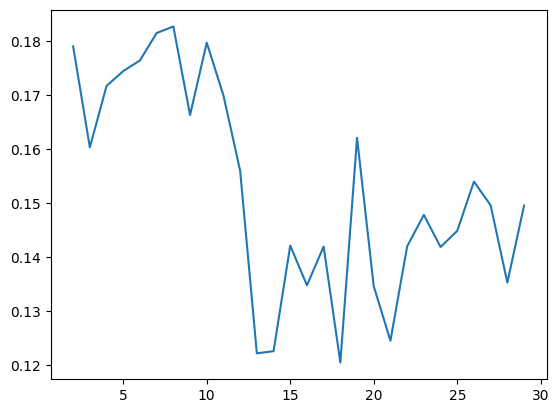

In [40]:
from sklearn.mixture import GaussianMixture as GMM
score = list()
mx = 0
highest = 0
for i in range(2,30):
    gmm = GMM(n_components=i).fit(X)
    labels = gmm.predict(X)
    s_score = silhouette_score(X, labels)
    score.append(s_score)
    if s_score > mx:
        mx = s_score
        highest = i
plt.plot(range(2,30), score)
highest


In [41]:
def get_accuracy(Y , labels, n_clusters):
    dic = {
    'Momen' : np.zeros(n_clusters),
    'Amr' : np.zeros(n_clusters),
    'Ibrahim' : np.zeros(n_clusters),
    'Mariam' : np.zeros(n_clusters),
    'Others' : np.zeros(n_clusters)}
    for i in range(len(Y)):
        dic[Y[i]][labels[i]] += 1
   
    print(f"Amr: n_cluster:     {np.argmax(dic['Amr'])}        accuracy: {max(dic['Amr'])/sum(dic['Amr'])}")
    print(dic['Amr'])
    
    print(f"Momen: n_cluster:   {np.argmax(dic['Momen'])}        accuracy: {max(dic['Momen'])/sum(dic['Momen'])}")
    print(dic["Momen"])
    
    print(f"Ibrahim: n_cluster:   {np.argmax(dic['Ibrahim'])}        accuracy: {max(dic['Ibrahim'])/sum(dic['Ibrahim'])}")
    print(dic["Ibrahim"])
    
    
    print(f"Mariam: n_cluster:   {np.argmax(dic['Mariam'])}        accuracy: {max(dic['Mariam'])/sum(dic['Mariam'])}")
    print(dic["Mariam"])

    
    print(f"Others: n_cluster:{np.argmax(dic['Others'])}  accuracy: {max(dic['Others'])/sum(dic['Others'])}")
    print(dic['Others'])
    

In [42]:
gmm = GMM(n_components=8).fit(X)
labels = gmm.predict(X)
get_accuracy(Y , labels, 8)

Amr: n_cluster:     3        accuracy: 0.3951219512195122
[ 0.  0. 43. 81.  0.  5.  4. 72.]
Momen: n_cluster:   4        accuracy: 0.7164948453608248
[  0.   0.  21.   0. 139.  29.   0.   5.]
Ibrahim: n_cluster:   1        accuracy: 0.5
[39. 61.  2.  0.  0.  2.  0. 18.]
Mariam: n_cluster:   5        accuracy: 0.6385542168674698
[ 0.  0.  0.  0.  0. 53.  0. 30.]
Others: n_cluster:0  accuracy: 0.447900466562986
[288.   6. 150.   2.  21.  10.  88.  78.]


In [43]:
y = df['result'] # result.
X = df.drop(columns = 'result', axis=1)

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

C:\Users\amrom\AppData\Local\Temp\ipykernel_47144\1597373593.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(heat_map_df.corr(), cmap="YlGnBu")


<AxesSubplot: >

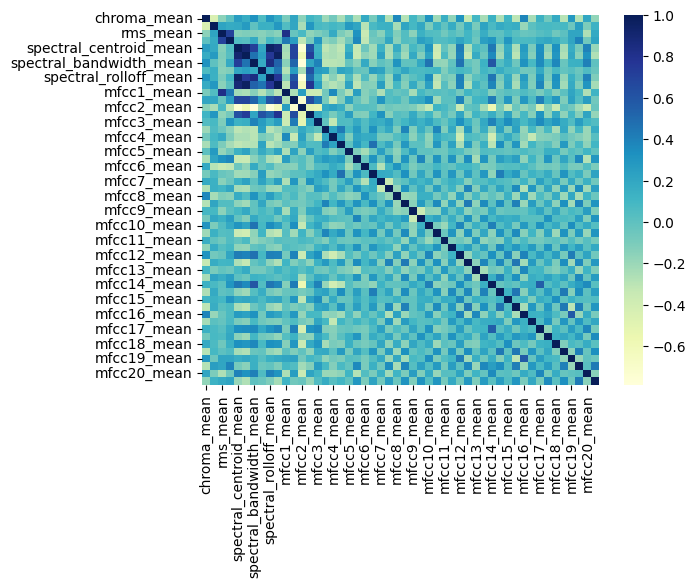

In [44]:
heat_map_df = pd.read_csv('voice_catigorized2.csv')
heat_map_df.replace(['Others','Amr','Ibrahim','Mariem',"Momen"],[0,1,2,3,4],inplace=True)
heat_map_df
sb.heatmap(heat_map_df.corr(), cmap="YlGnBu")

In [18]:
heat_map_df

,chroma_mean,chroma_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,result
0,0.333621,0.095133,0.040846,0.002398,2052.740809,5.255800e+05,1871.000058,222105.011805,3769.053071,2.385099e+06,...,109.071625,-11.428280,75.022790,-0.883200,39.580692,-10.479553,51.611053,-4.341966,71.090830,1
1,0.383800,0.090671,0.026000,0.001144,1628.606369,3.186613e+05,1960.535688,107177.377433,3056.724811,1.556158e+06,...,75.582810,-7.179643,143.878750,0.045349,54.615640,-5.123288,24.375160,-4.366772,36.149240,1
2,0.368357,0.098584,0.034639,0.002227,1854.896855,6.968262e+05,2042.833293,228449.206972,3601.366346,3.323660e+06,...,65.165990,-8.845000,117.663750,-0.011224,78.250850,-6.601578,32.016540,-5.366591,43.806274,1
3,0.401233,0.092808,0.051446,0.004928,1612.500601,5.786580e+05,1899.939031,342337.671833,3269.210500,4.207528e+06,...,72.915250,-5.639864,65.970490,0.025637,89.969060,-5.633664,78.978970,-2.806619,36.147570,1
4,0.425950,0.087210,0.021331,0.001097,1671.475902,3.816570e+05,1990.761953,185032.749067,3197.928172,2.540907e+06,...,59.994728,-4.261891,49.470524,-1.805944,43.963830,-6.941187,24.361345,-3.390086,24.226759,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0.430784,0.091956,0.046783,0.006206,4113.574704,8.765243e+06,2079.460141,352949.346018,5850.843548,1.333551e+07,...,23.107965,-3.258664,57.187214,1.657221,20.512024,-1.004469,17.257654,1.791618,13.859071,0
1243,0.457786,0.083115,0.033215,0.002944,2760.175859,6.663784e+06,1923.367413,267212.907450,4153.556876,1.094091e+07,...,34.443260,-5.189065,34.785717,2.796566,19.514570,-1.407719,16.584867,-1.060594,19.550674,0
1244,0.452243,0.085037,0.045468,0.006496,3121.107682,8.108941e+06,1902.818693,244477.714619,4501.676994,1.237919e+07,...,37.989754,-5.464025,40.812744,0.015728,17.469496,0.137661,19.067953,1.695813,8.006286,0
1245,0.441338,0.100571,0.034034,0.002655,3755.324497,9.291051e+06,1962.829955,338356.034288,5254.720333,1.468672e+07,...,17.198070,-3.898363,31.695473,1.933409,13.959158,-1.614611,21.425362,-0.580612,13.971685,0


In [45]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [46]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")



Accuracy Naive Bayes : 0.89867 

Accuracy Stochastic Gradient Descent : 0.94667 

Accuracy KNN : 0.944 

Accuracy Decission trees : 0.824 

Accuracy Random Forest : 0.89867 

Accuracy Support Vector Machine : 0.98133 

Accuracy Logistic Regression : 0.94133 



C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Neural Nets : 0.93867 



C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [47]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

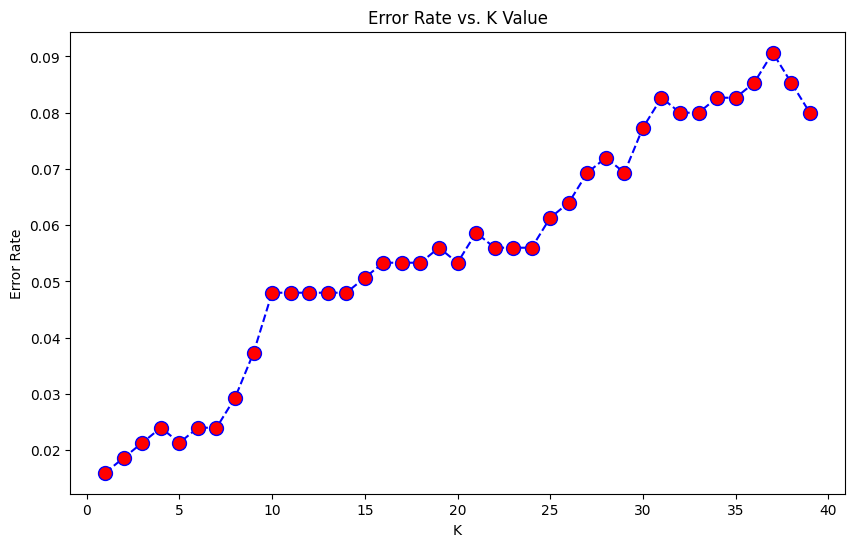

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)
preds = model.predict(X_test)
#print(confusion_matrix(y_test, preds))
round(accuracy_score(y_test, preds), 5)

0.944

In [17]:
def get_result(file):
    audio, sr = librosa.load(file, duration=2)

    features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var()]
    mfcc = librosa.feature.mfcc(y=audio)
    mfcc_list = []
    for i in range(len(mfcc)):
        mfcc_list.append(mfcc[i].mean())
        mfcc_list.append(mfcc[i].var())
    features = features + mfcc_list
    scaled = min_max_scaler.transform([features])
    res = model.predict(scaled)
    return res
get_result('operating copy.wav')[0]

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Amr'

In [56]:
audio, sr = librosa.load('operating copy.wav', duration=2)
sr
audio = librosa.effects.trim(audio)


In [57]:

audio, sr = librosa.load('C:/Users/amrom/OneDrive/Desktop/task_3_workspace/Voice-Recognition-System/Model/data/Amr/Amr1.wav', duration=2)
sr

22050

In [58]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

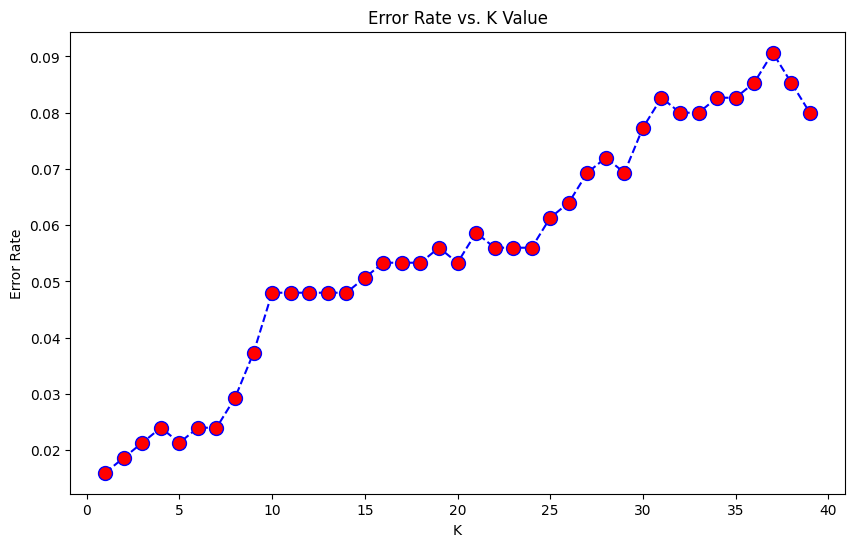

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
from IPython.display import Audio 
audio, sr = librosa.load('C:/Users/amrom/OneDrive/Desktop/task_3_workspace/Voice-Recognition-System/Model/Recongise_identity/Amr/_Voice 019 (1).wav', duration=2)
audio = librosa.effects.trim(audio)
Audio(audio[1], rate=sr)